# Synthetic Data Evaluation CTGAN

NCDB

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy.stats import skew,kurtosis
import scipy.stats as stats

import sdv
from sdv.tabular import CTGAN, GaussianCopula, CopulaGAN, TVAE
from sdv.evaluation import evaluate
from table_evaluator import TableEvaluator
import sweetviz as sv
import torch
import pickle
import io


import sys
import os
sys.path.append(os.path.abspath('..'))
sys.path.append(os.path.abspath('../src'))
from auxiliar.Constants import field_types, field_transformers
from auxiliar.metadata import metadata, table_metadata
from auxiliar.aux_func import qqploter, var_comparative, get_deviation_of_mean_perc, histogram_wo_outliers


import warnings
warnings.filterwarnings('ignore')

{'tables': {'ncbd': {'fields': {'year': {'type': 'numerical', 'subtype': 'integer', 'transformer': 'integer'}, 'quarter': {'type': 'categorical', 'transformer': None}, 'weekday': {'type': 'categorical', 'transformer': None}, 'hour': {'type': 'categorical', 'transformer': 'categorical_fuzzy'}, 'vehicles_involved': {'type': 'numerical', 'subtype': 'integer', 'transformer': 'integer'}, 'crash_type': {'type': 'categorical', 'transformer': 'categorical_fuzzy'}, 'crash_place': {'type': 'categorical', 'transformer': 'categorical_fuzzy'}, 'crash_weather': {'type': 'categorical', 'transformer': 'categorical_fuzzy'}, 'surface_state': {'type': 'categorical', 'transformer': 'categorical_fuzzy'}, 'road_slope': {'type': 'categorical', 'transformer': 'categorical_fuzzy'}, 'traffic_state': {'type': 'categorical', 'transformer': 'categorical_fuzzy'}, 'vehicle_type': {'type': 'categorical', 'transformer': 'categorical_fuzzy'}, 'vehicle_age': {'type': 'numerical', 'subtype': 'integer', 'transformer': 'in

In [11]:
train = pd.read_parquet("../data/interim/train.parquet")
test = pd.read_parquet("../data/interim/test.parquet")

In [3]:
# Real and synthetic data
generator = CTGAN.load('../models/ctgan.pkl') 

In [ ]:
%%time
#np.random.seed(2022)
#synthetic_data = generator.sample(len(train)*2)
#save data
#synthetic_data.to_parquet('../data/synth/synth_ctgan.parquet', index=False)

In [ ]:
#save data
synthetic_data.to_parquet('../data/synth/synth_ctgan.parquet', index=False)

In [12]:
#load data
synthetic_data = pd.read_parquet('../data/synth/synth_ctgan.parquet')

## Train Test Comparison

                                             |          | [  0%]   00:00 -> (? left)


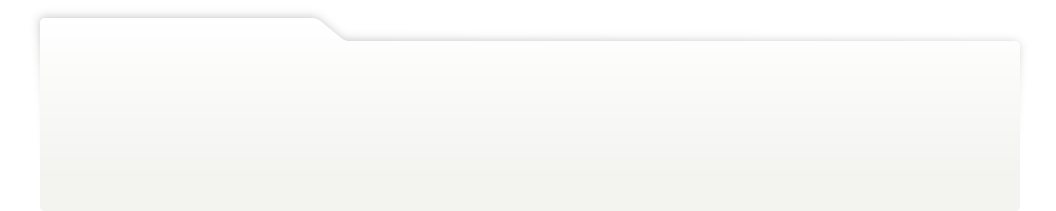
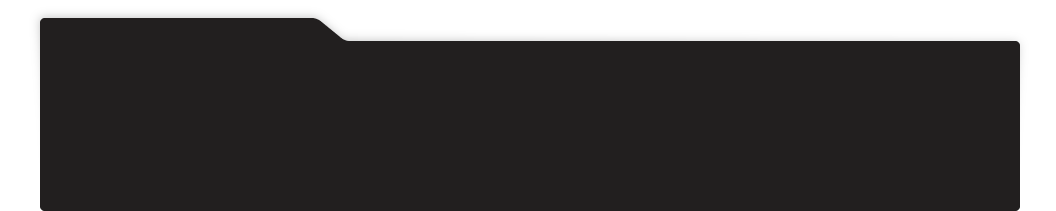
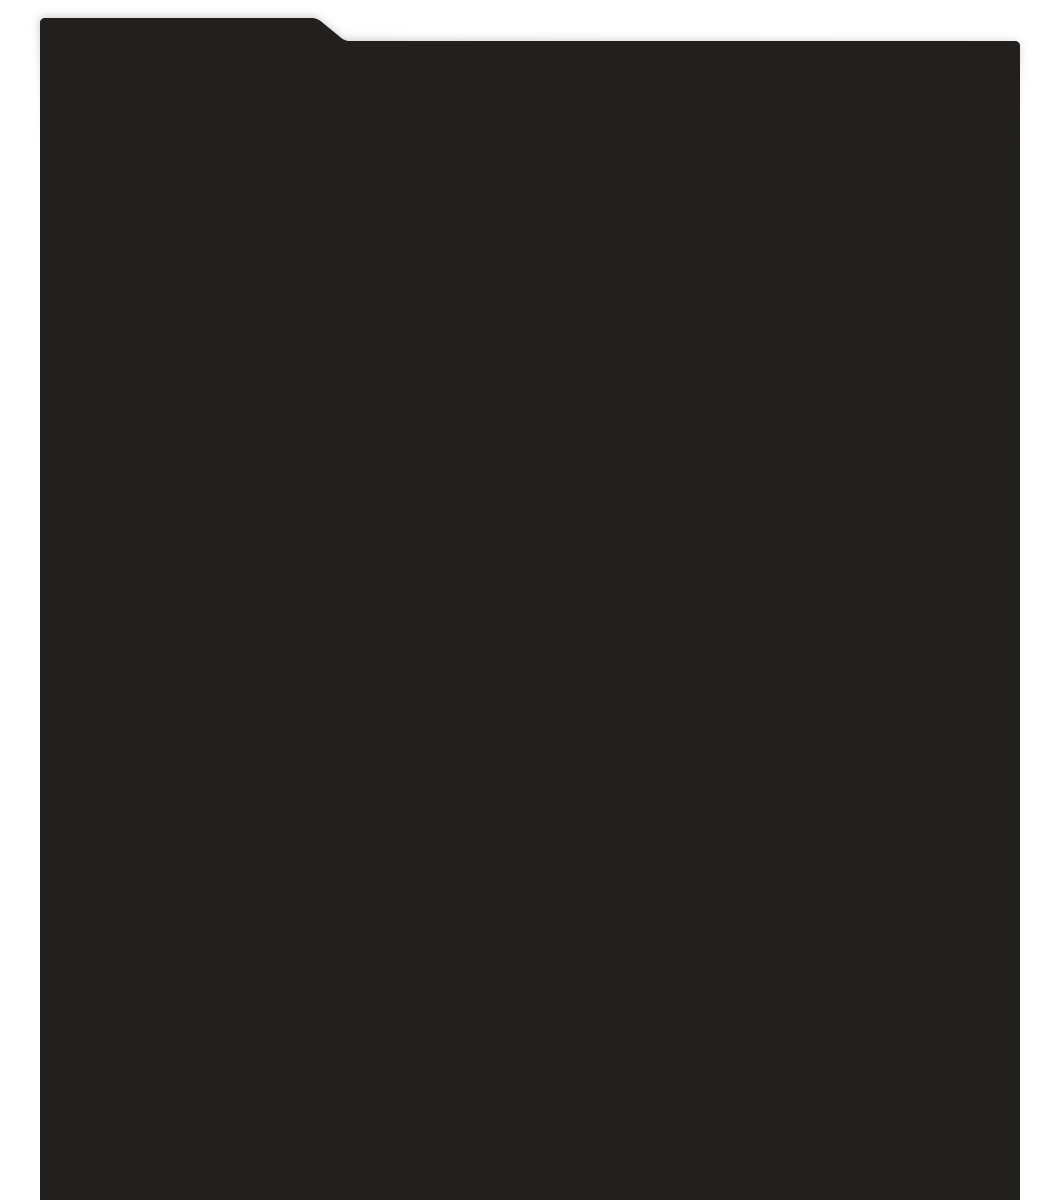
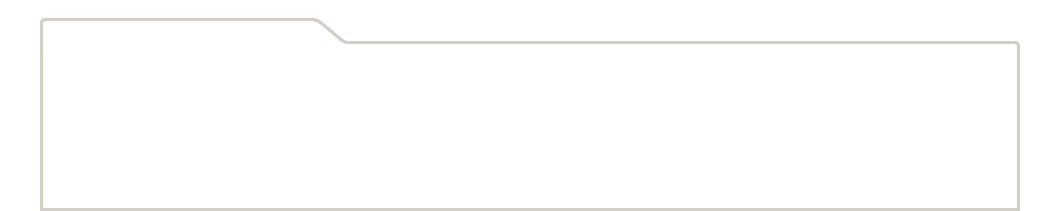
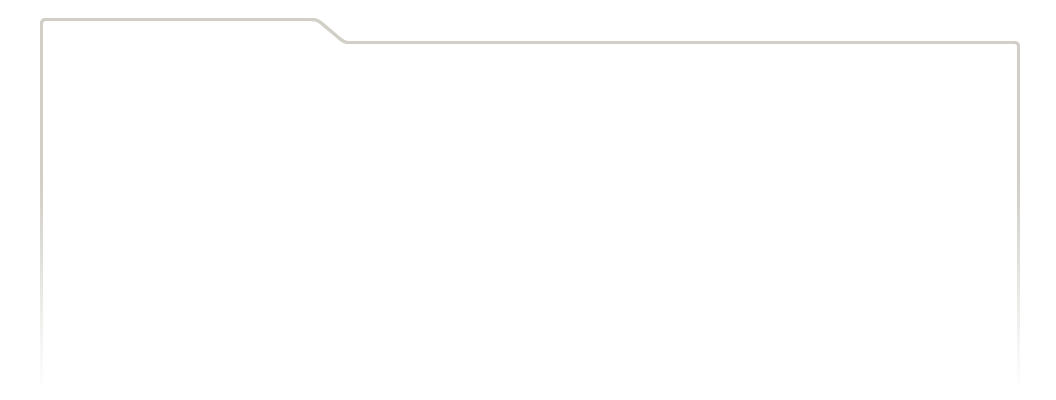
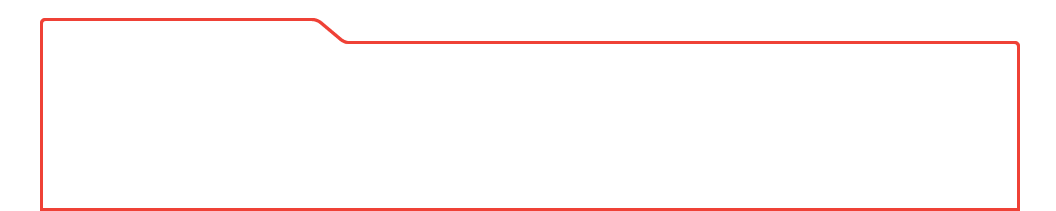
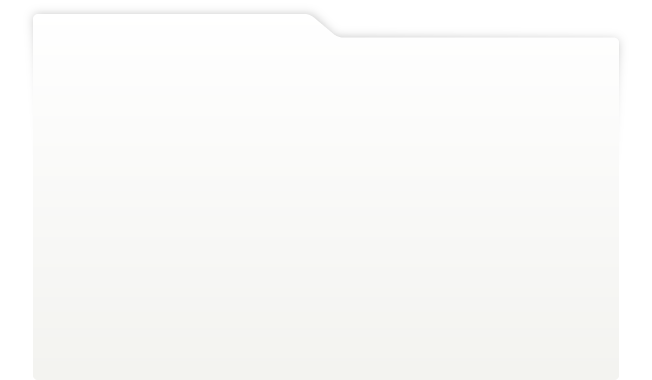
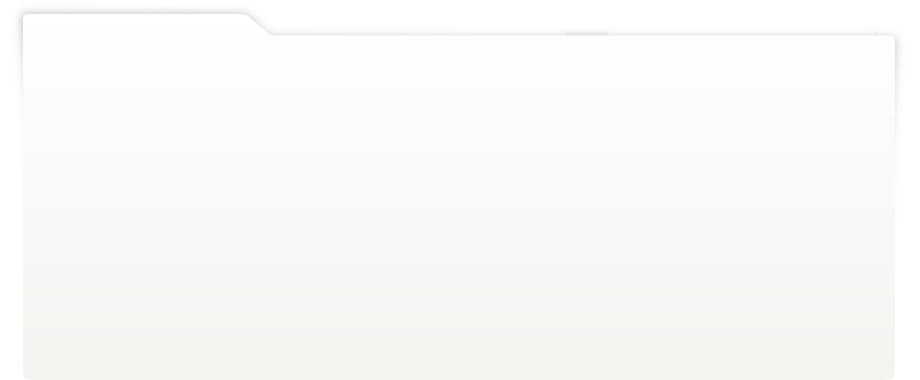
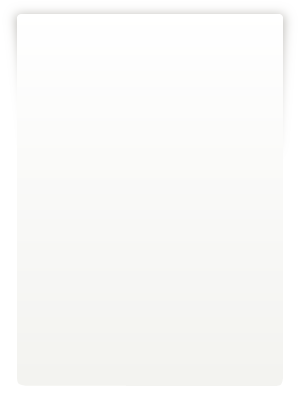
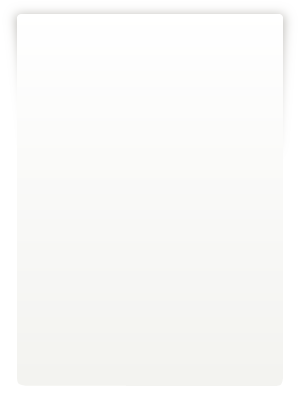
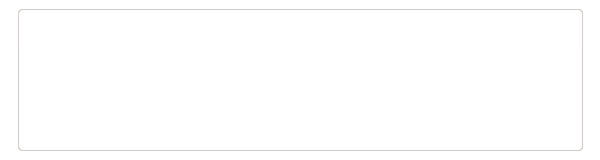
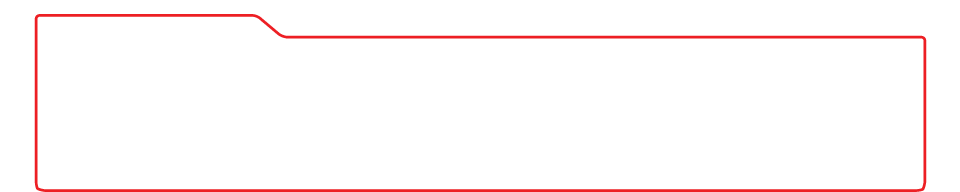
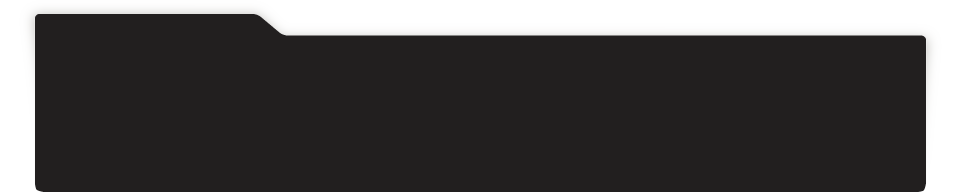
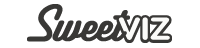
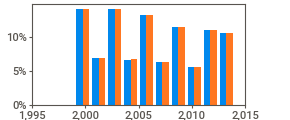
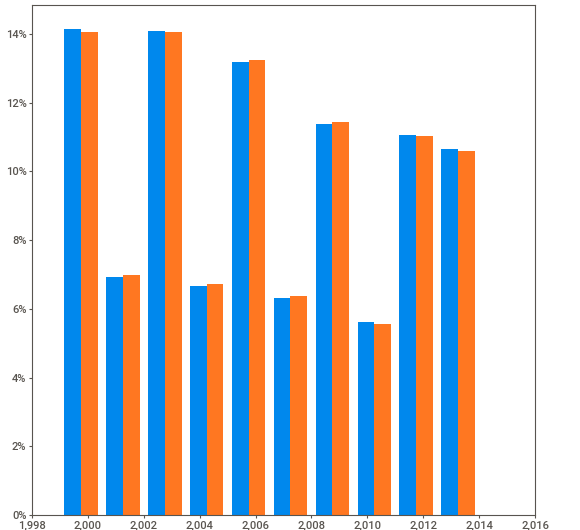
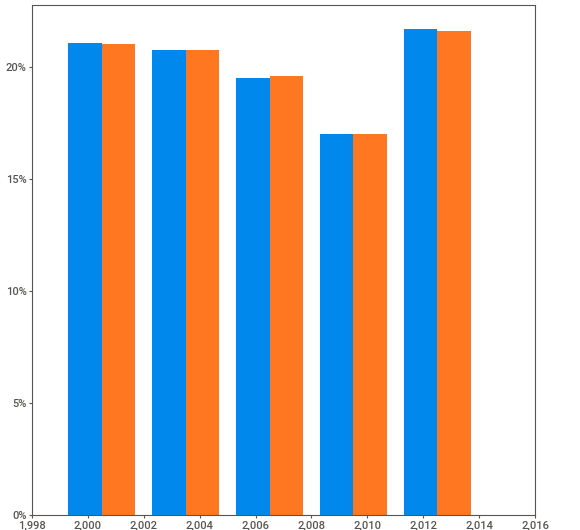
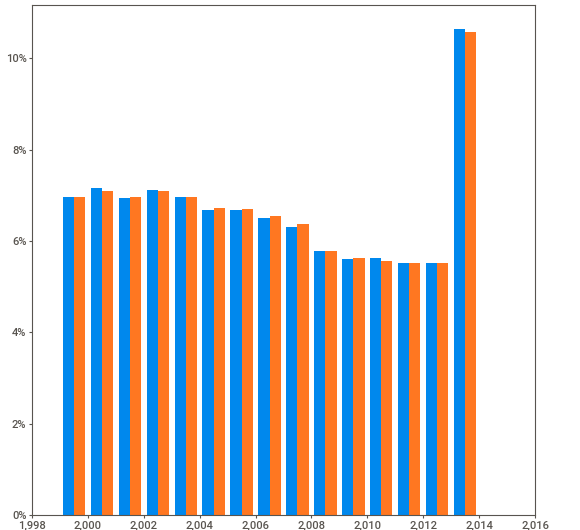
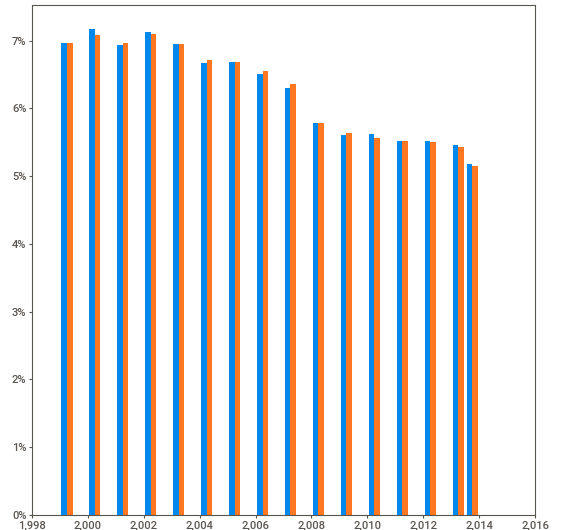
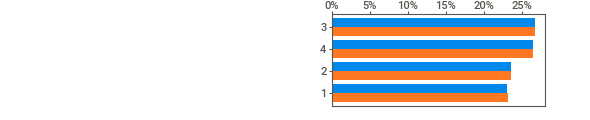
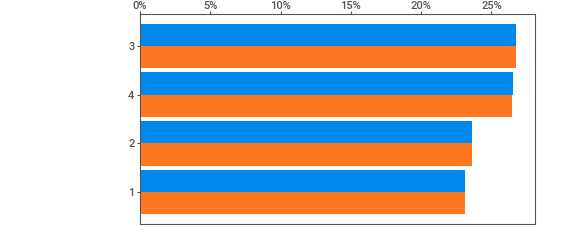
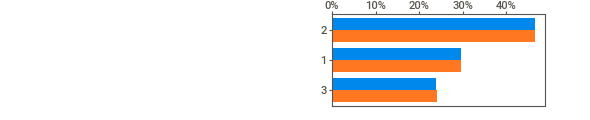
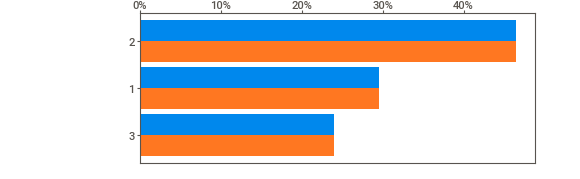
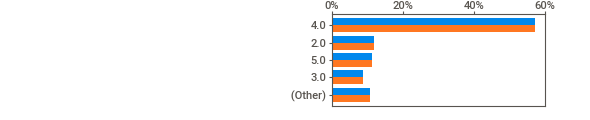
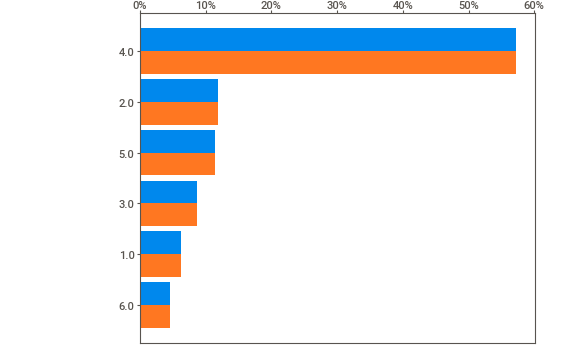
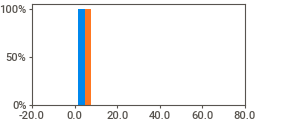
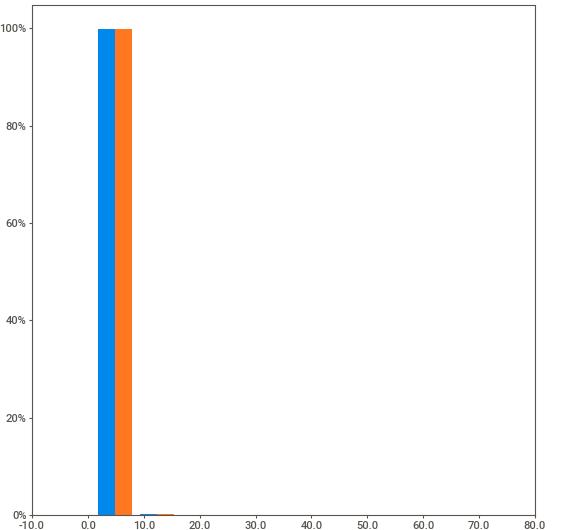
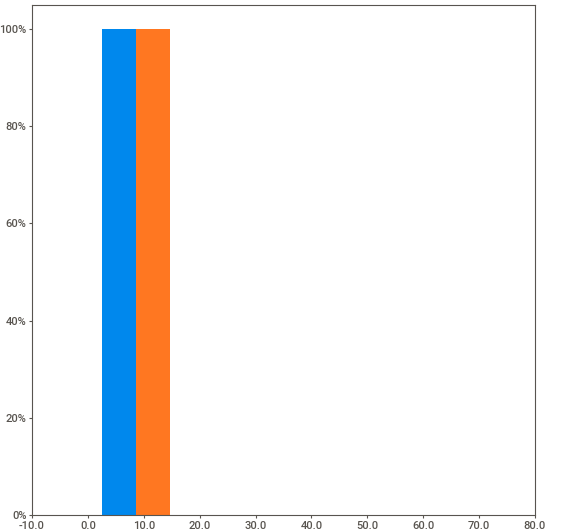
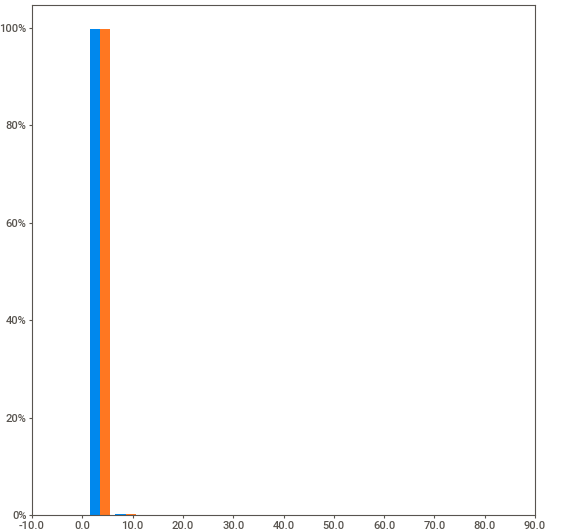
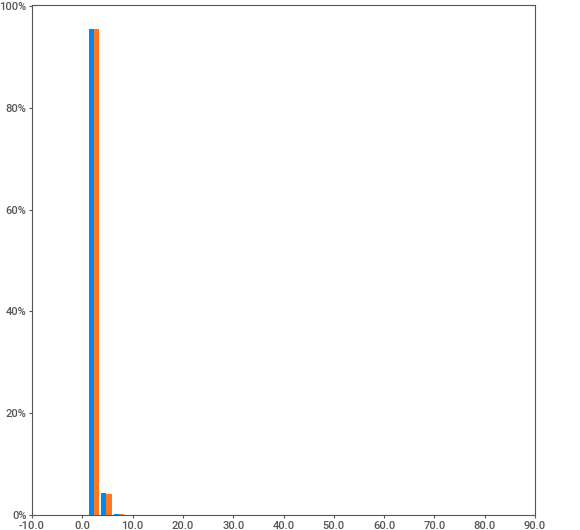
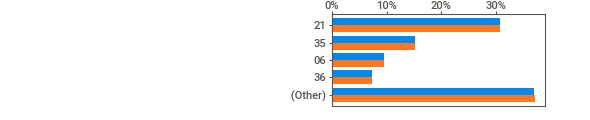
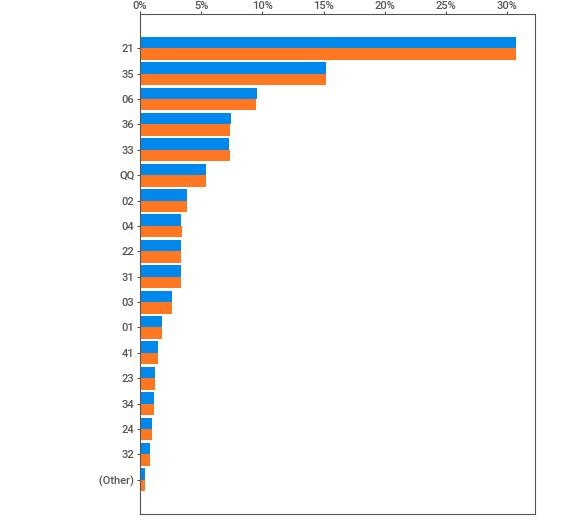
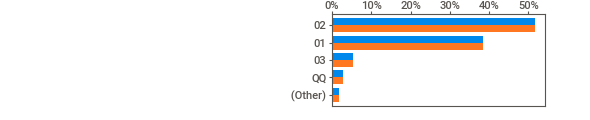
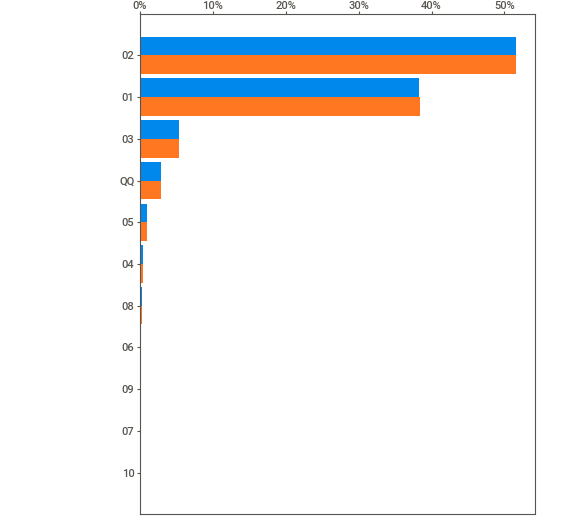
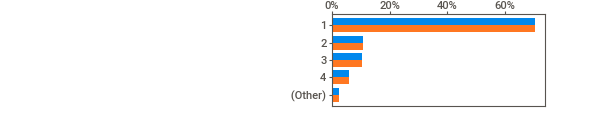
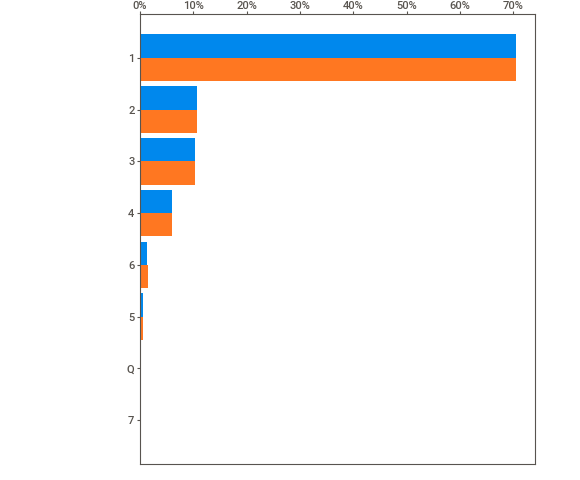
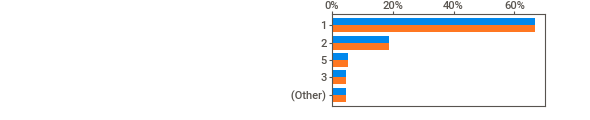
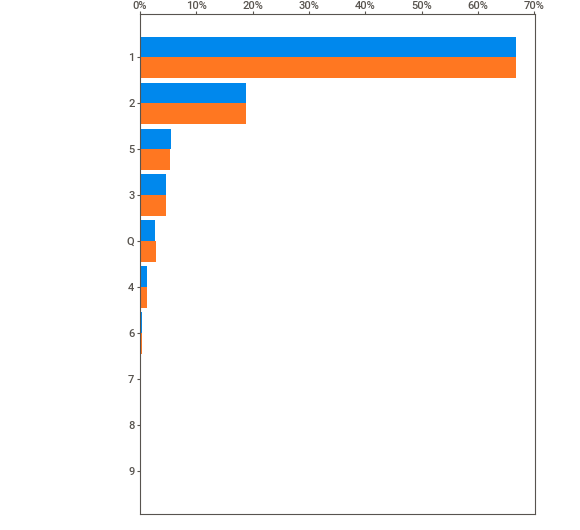
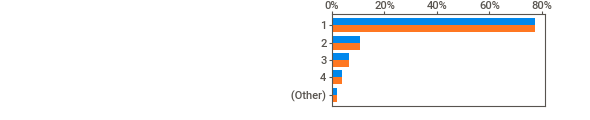
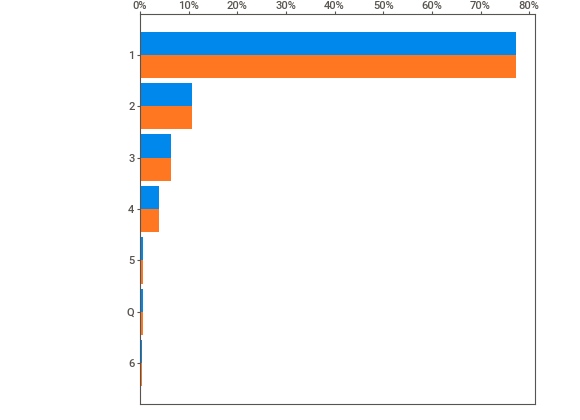
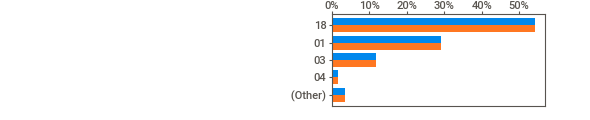
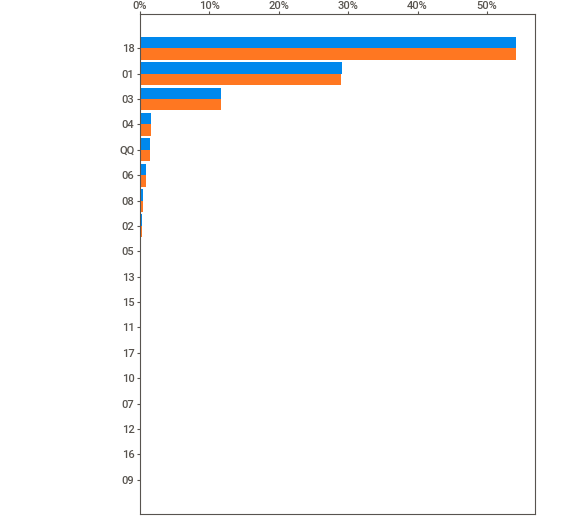
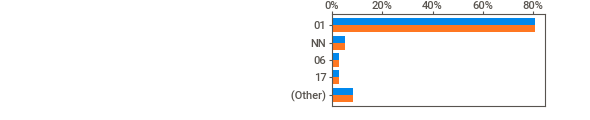
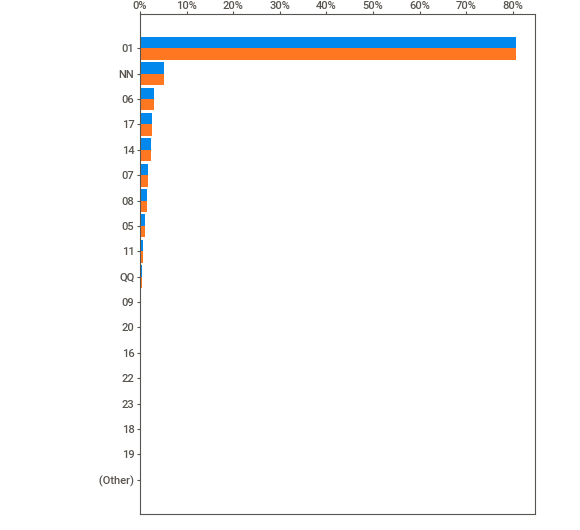
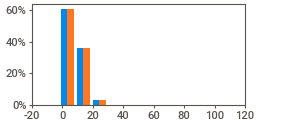
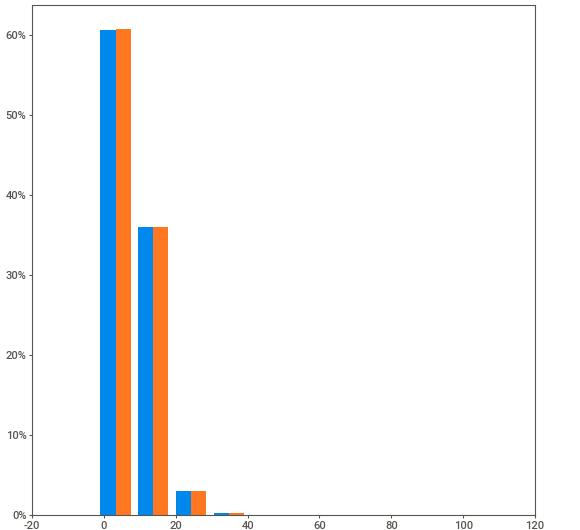
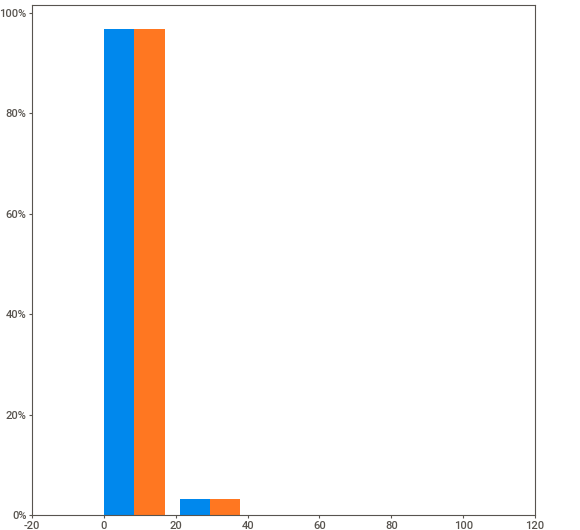
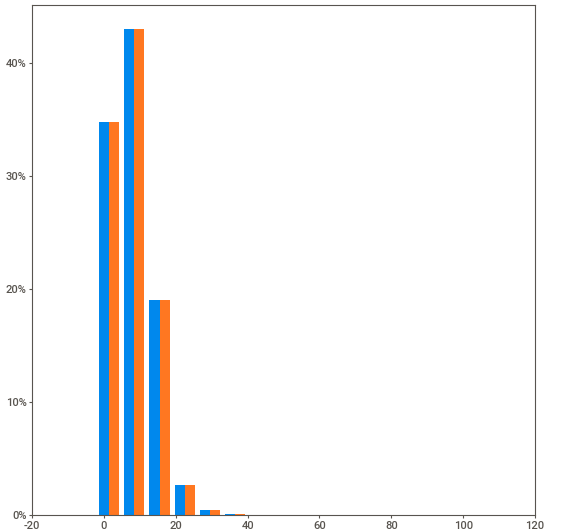
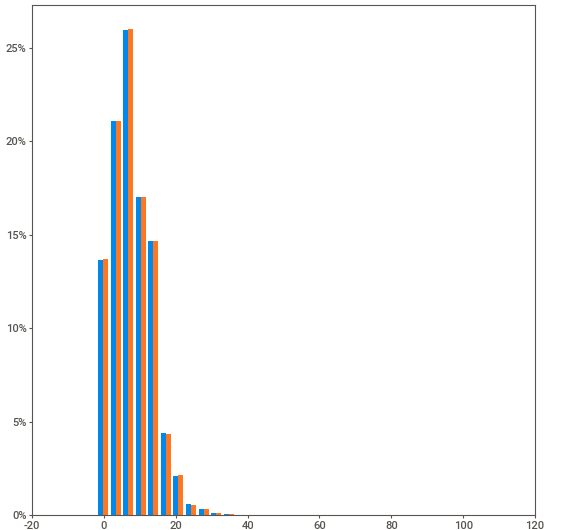
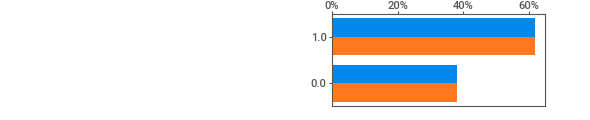
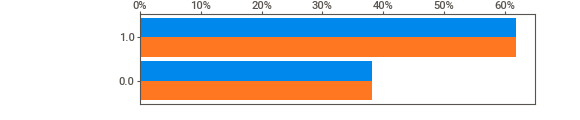
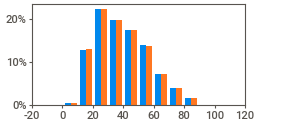
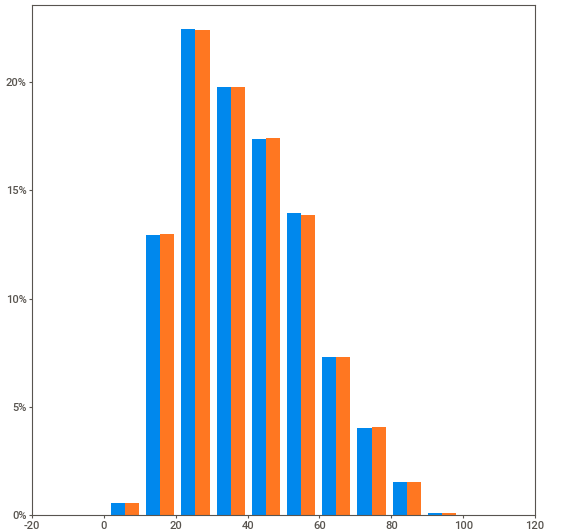
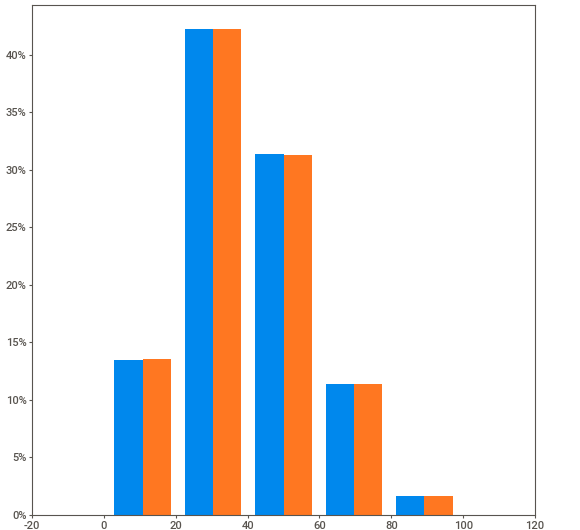
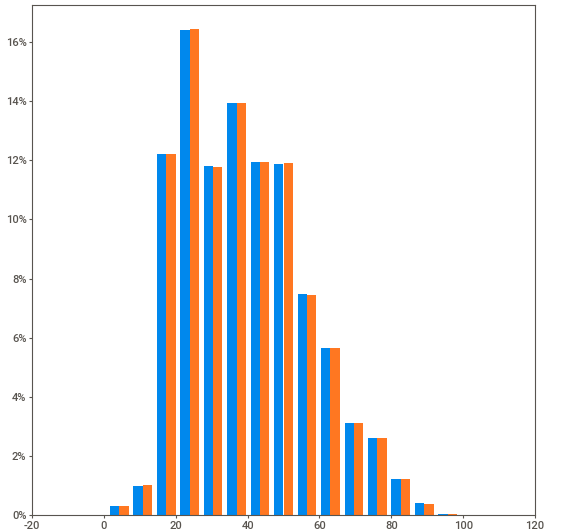
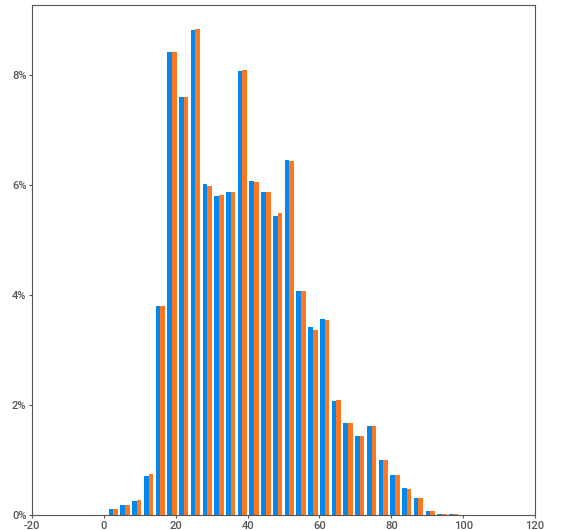
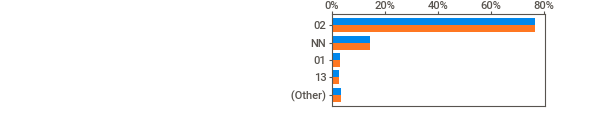
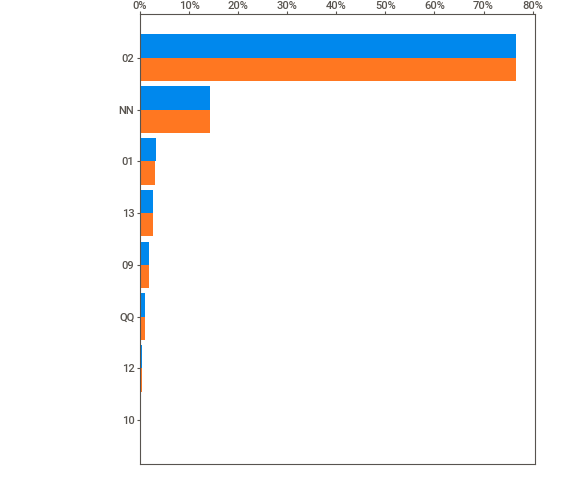
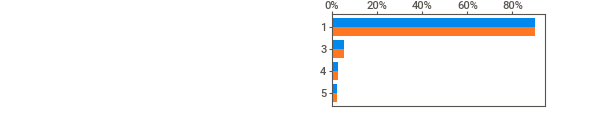
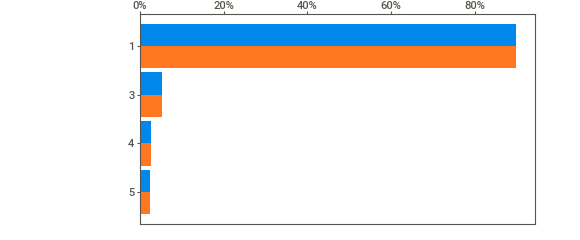
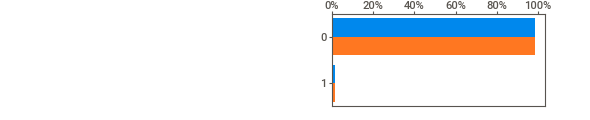
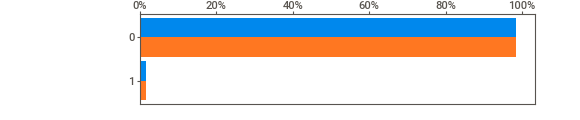
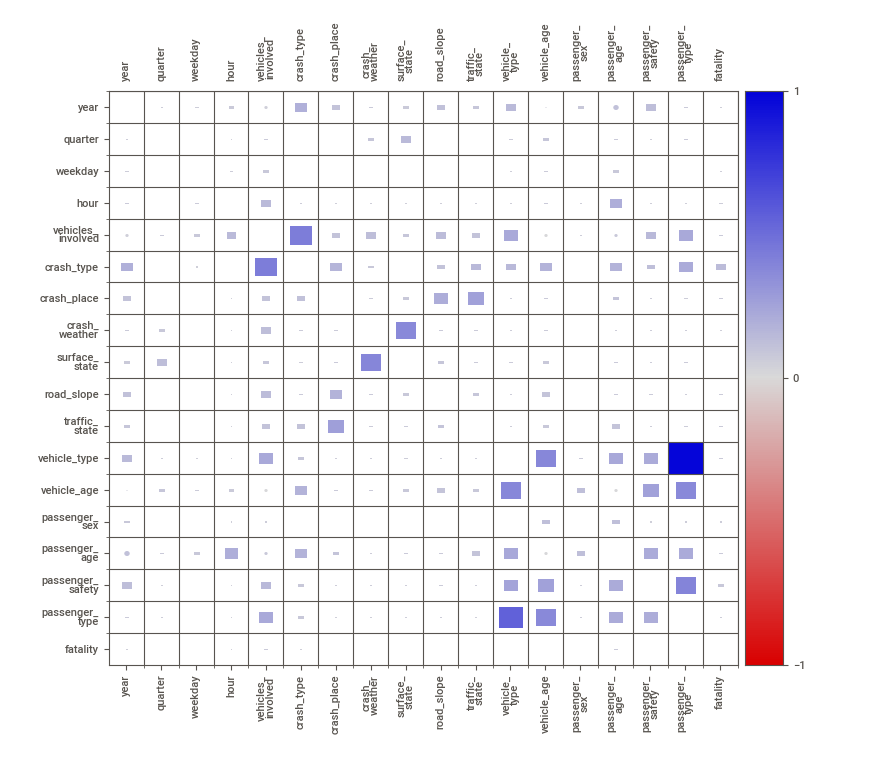
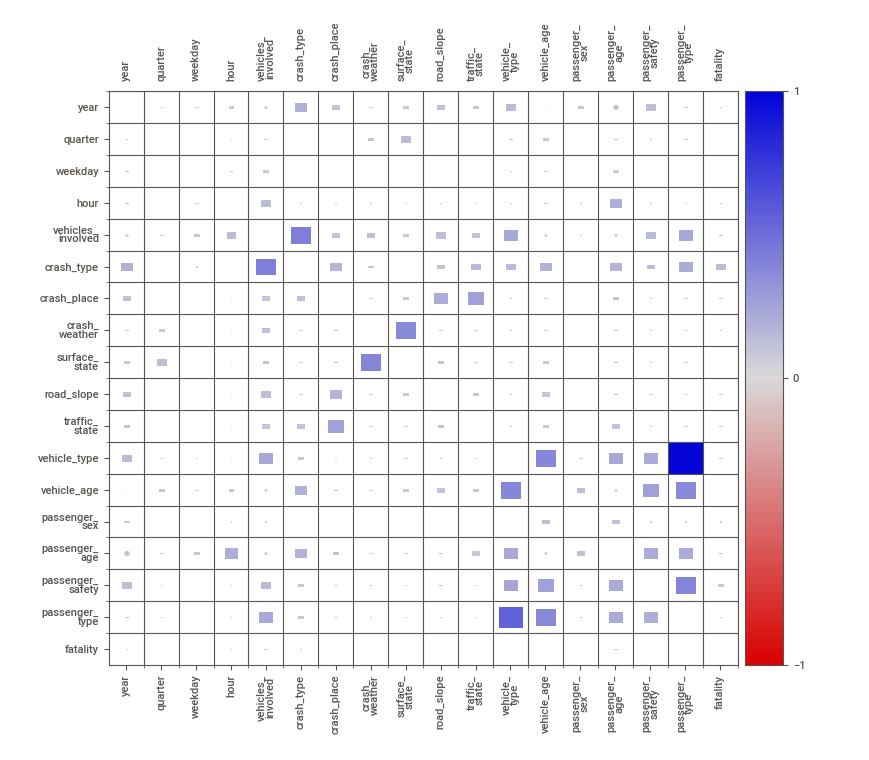

In [7]:
feature_config = sv.FeatureConfig() #,force_text=[""]
my_report = sv.compare([train, "Train"], [test, "Test"], feat_cfg=feature_config)
my_report.show_notebook( 
            layout='widescreen', 
            scale=None)

## Real Data & Synthetic Data Comparison

In [13]:
real_data = test

                                             |          | [  0%]   00:00 -> (? left)


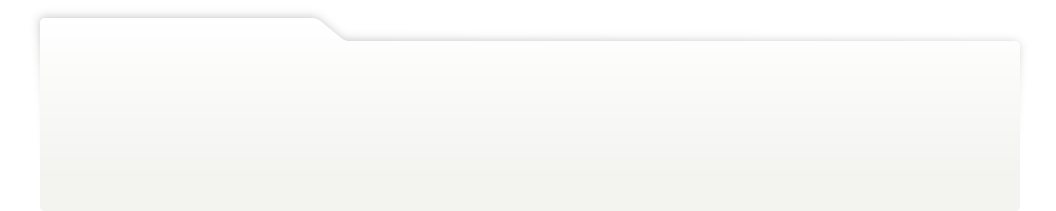
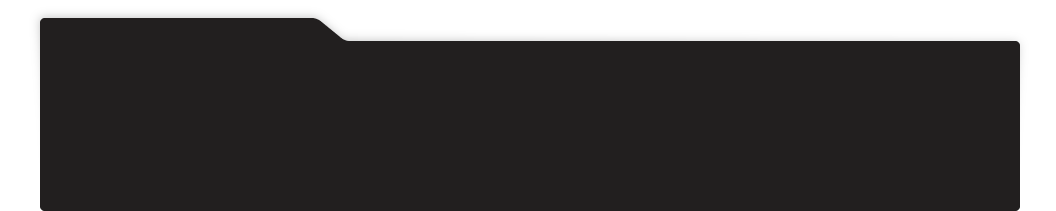
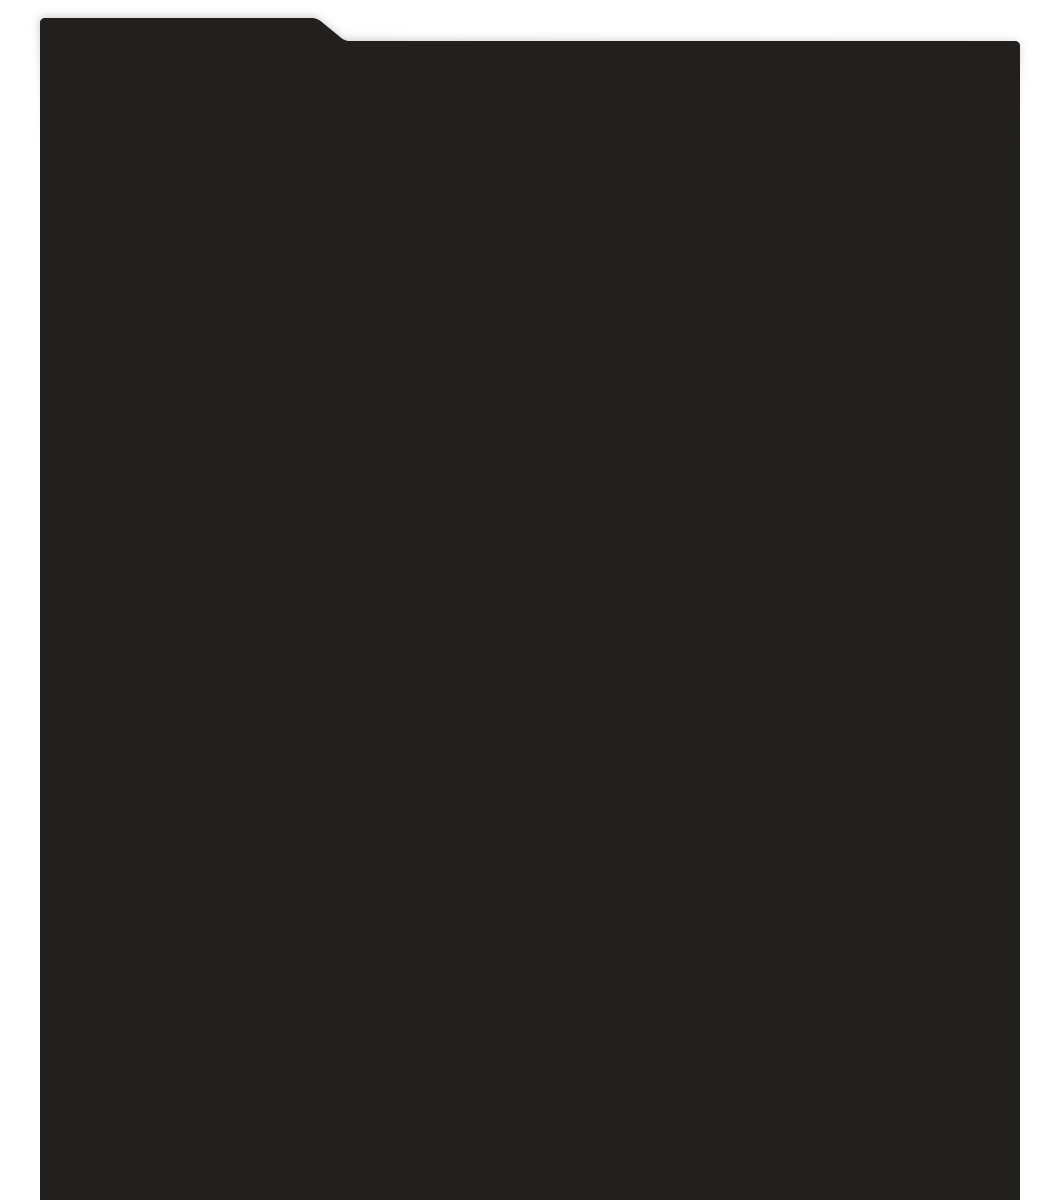
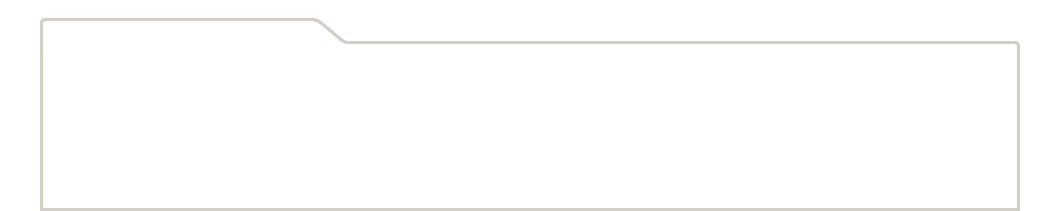
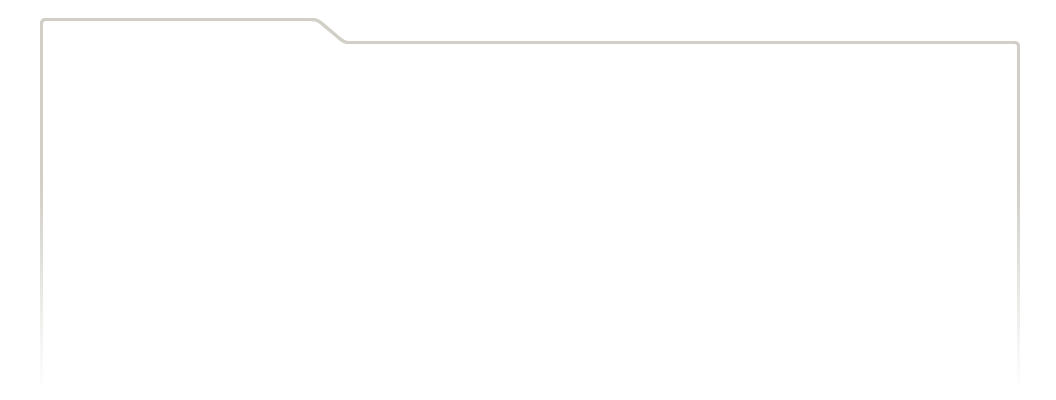
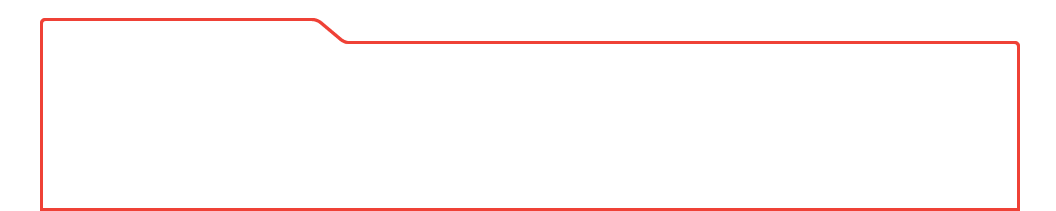
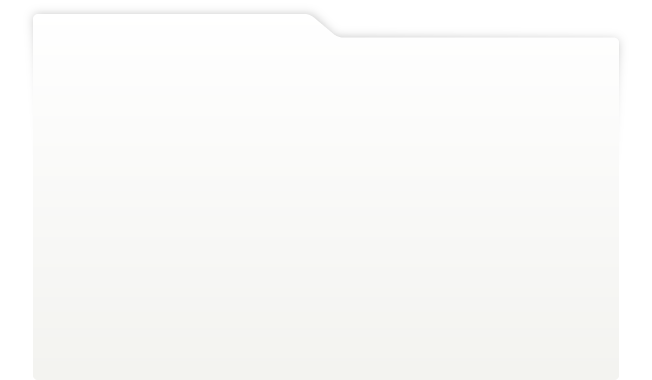
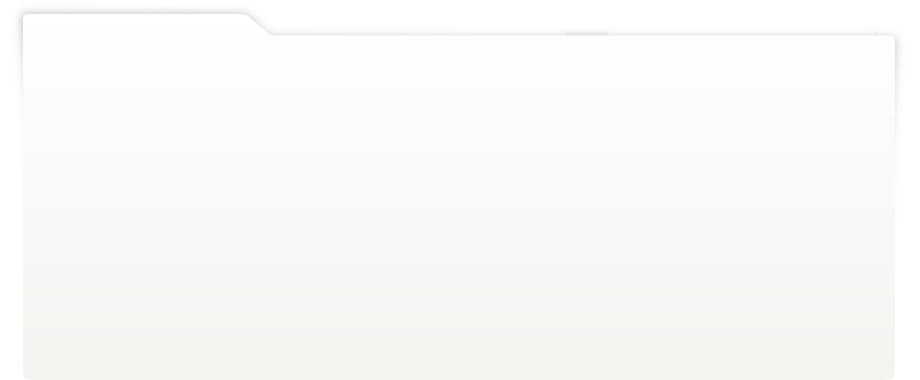
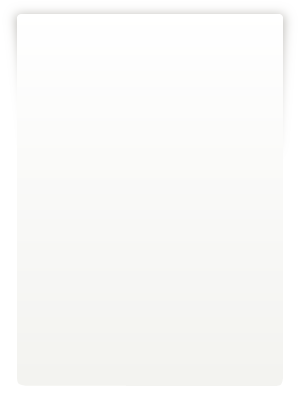
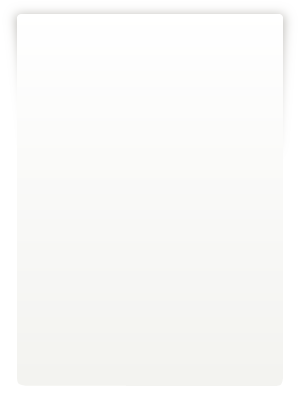
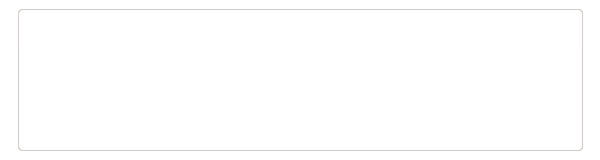
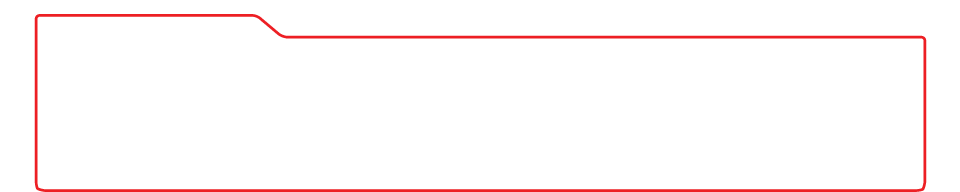
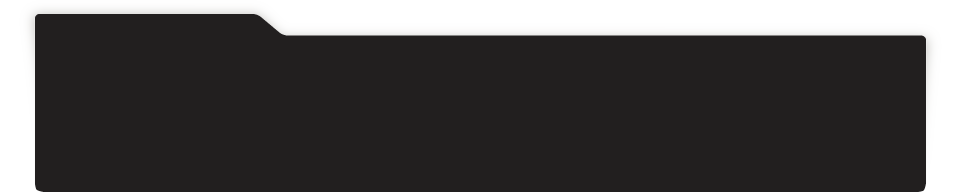
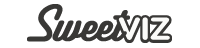
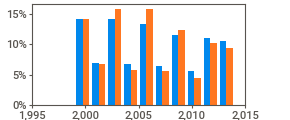
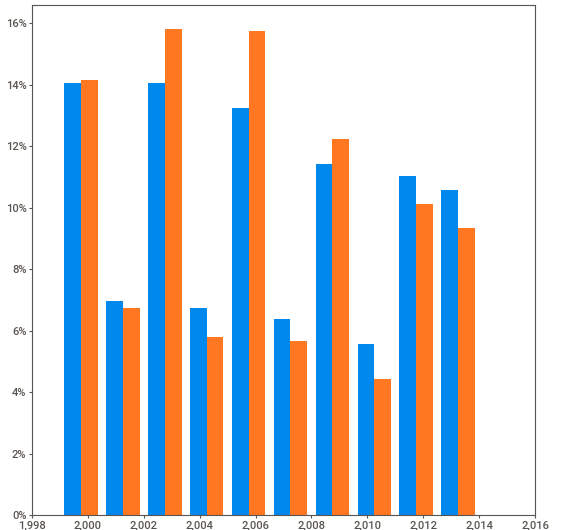
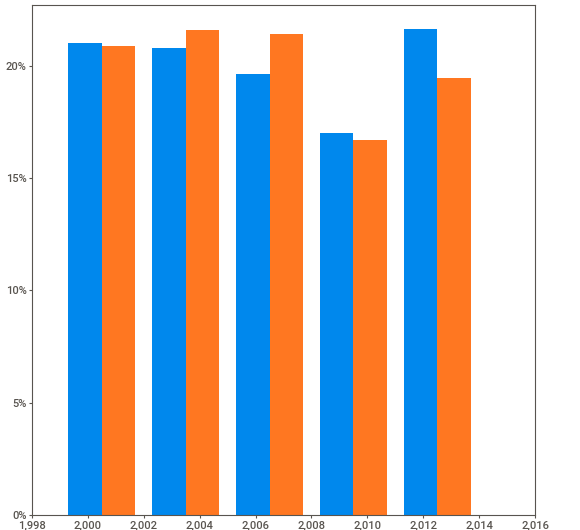
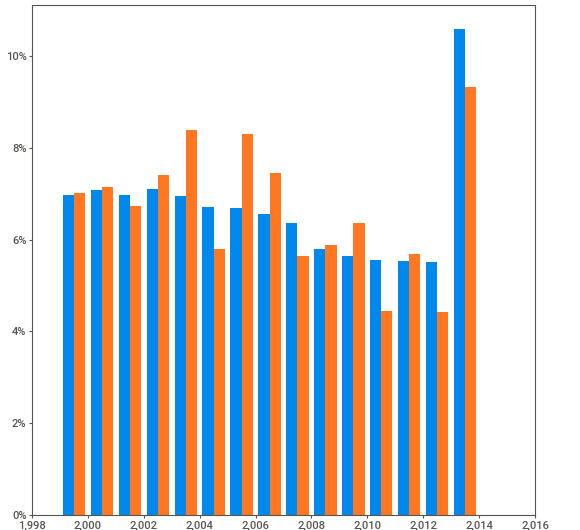
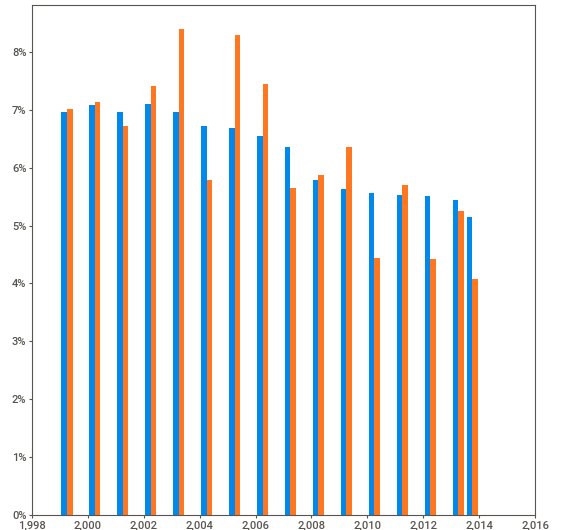
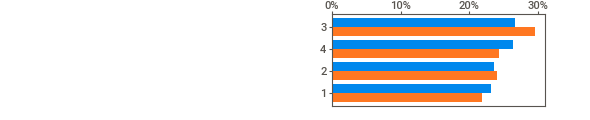
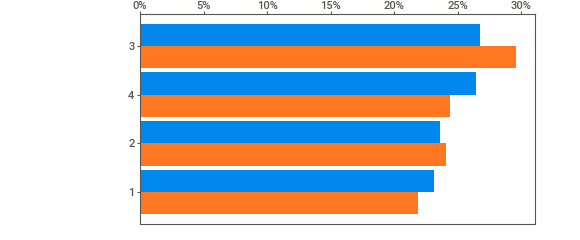
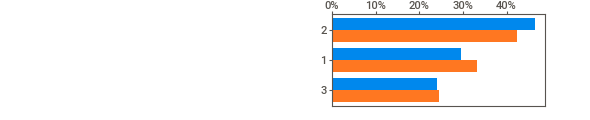
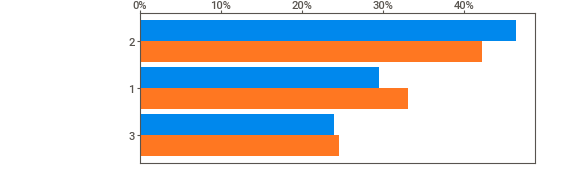
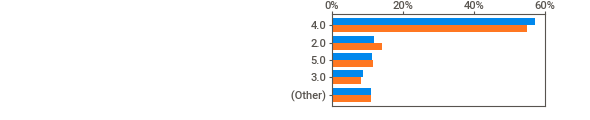
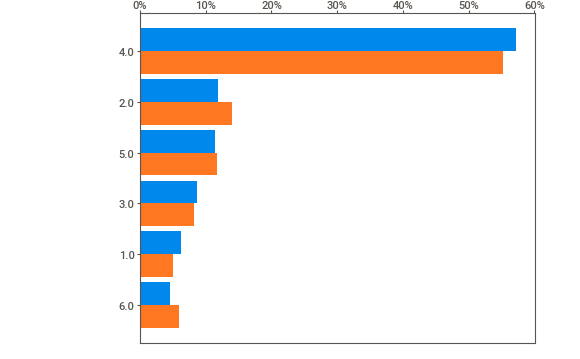
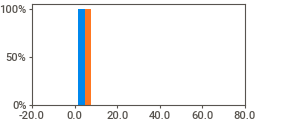
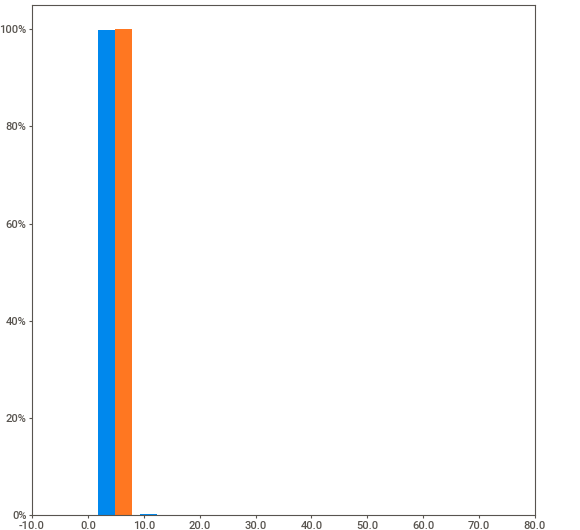
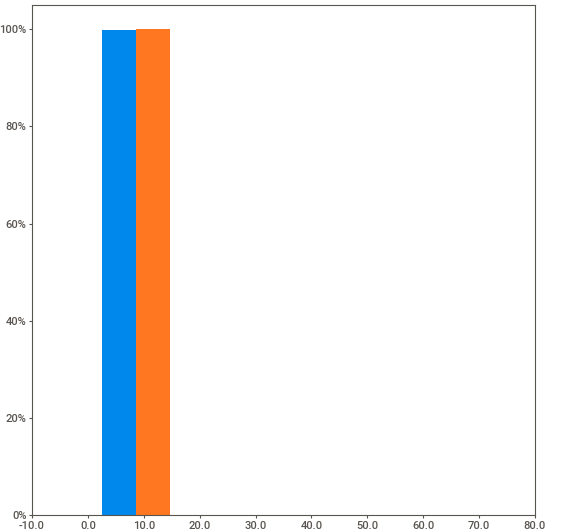
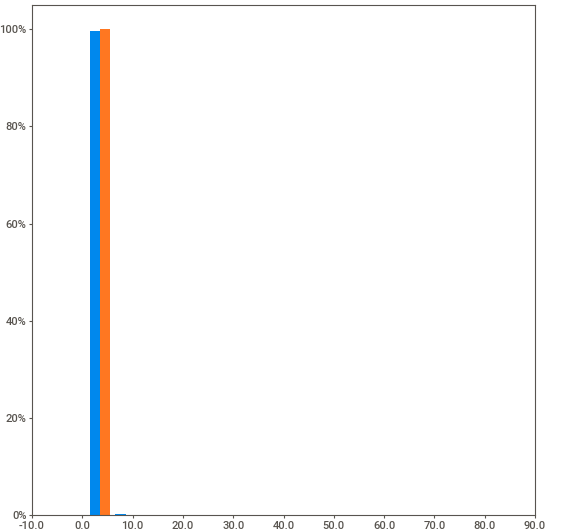
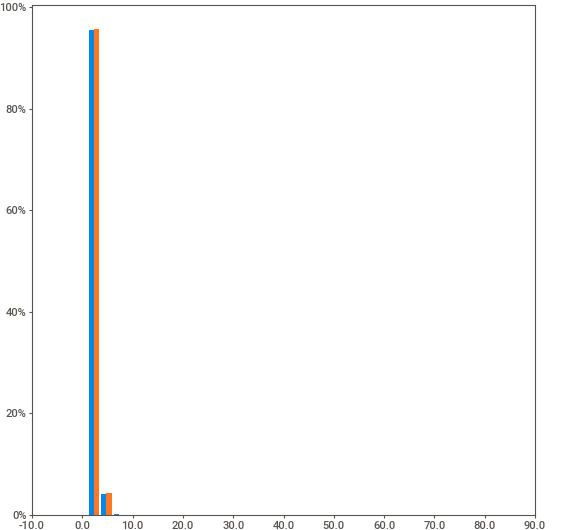
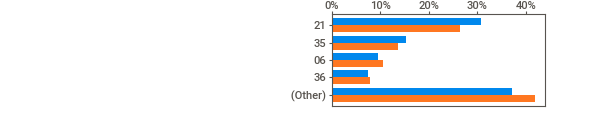
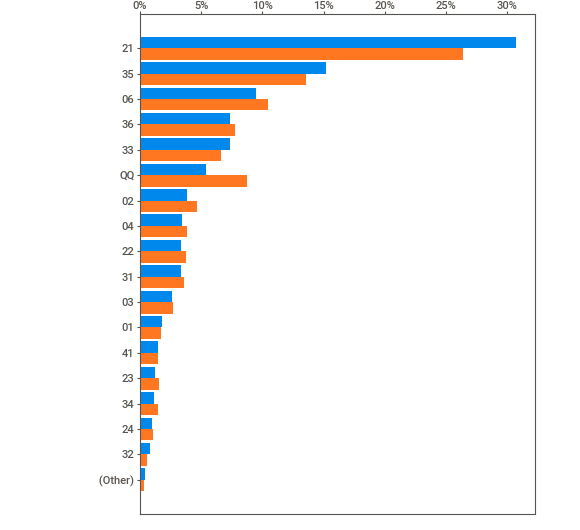
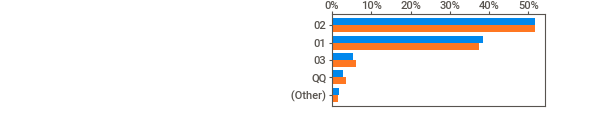
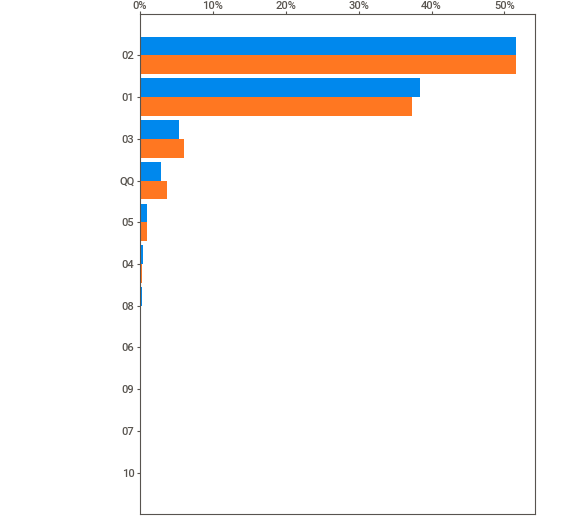
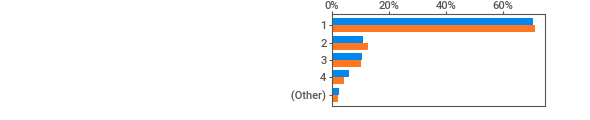
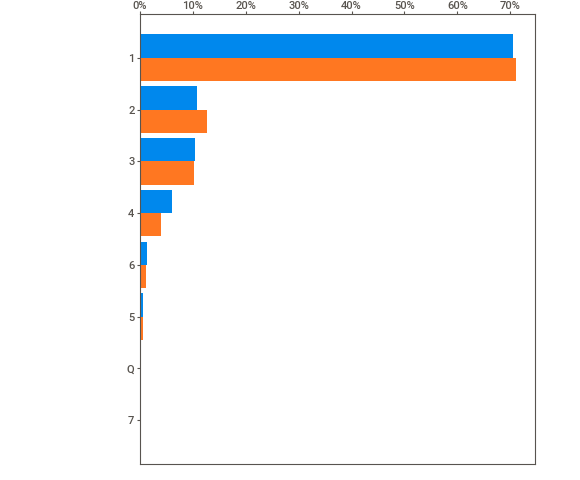
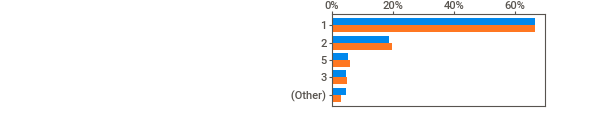
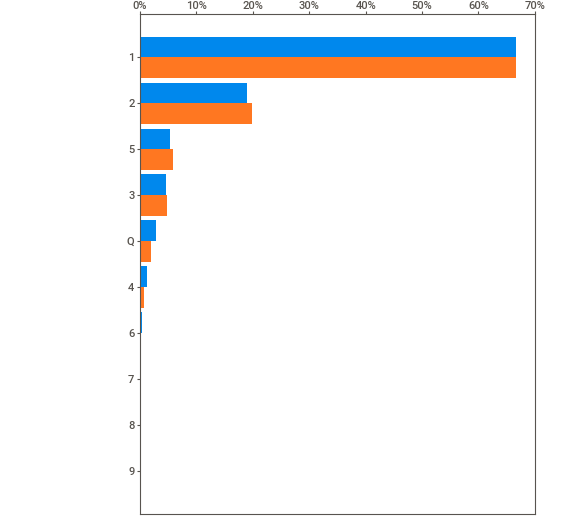
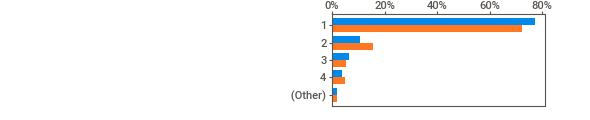
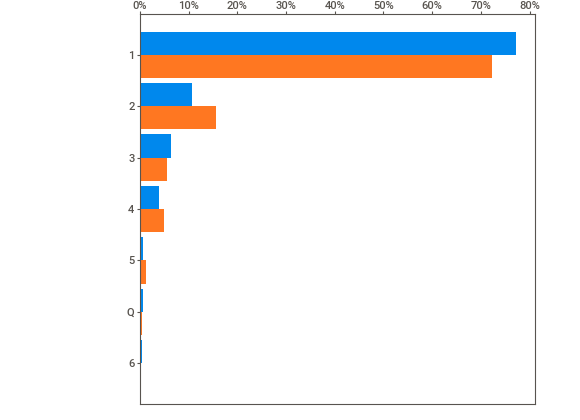
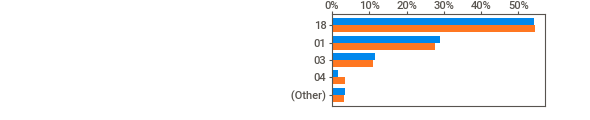
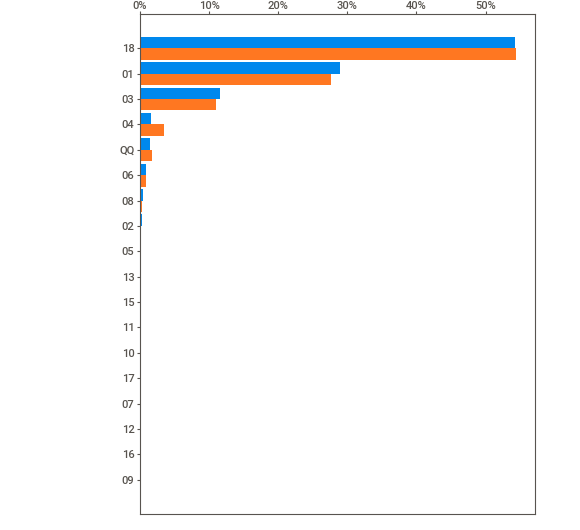
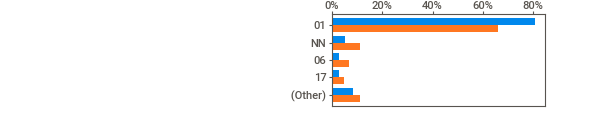
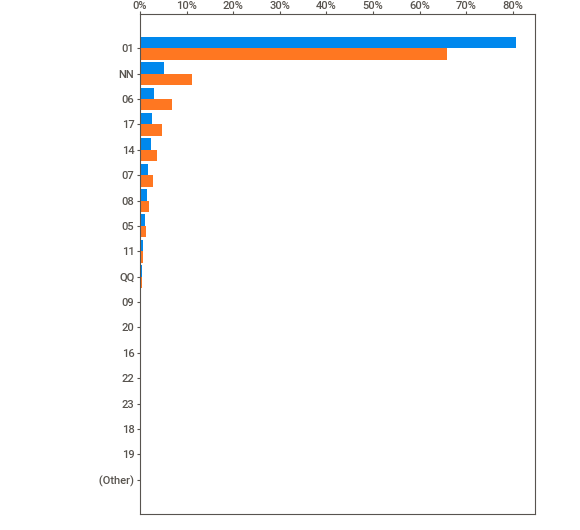
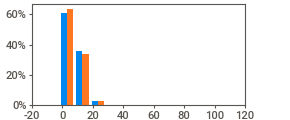
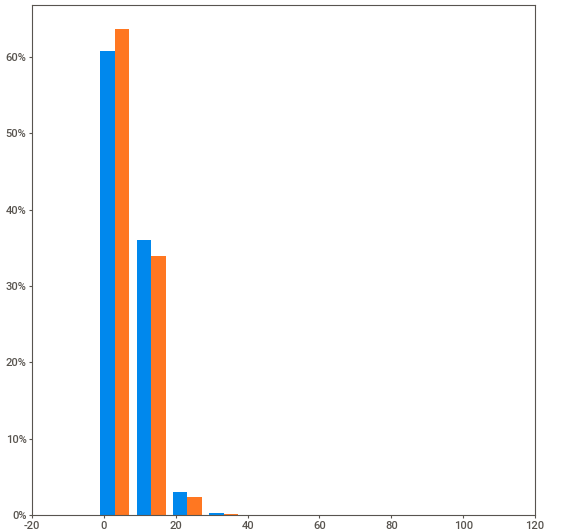
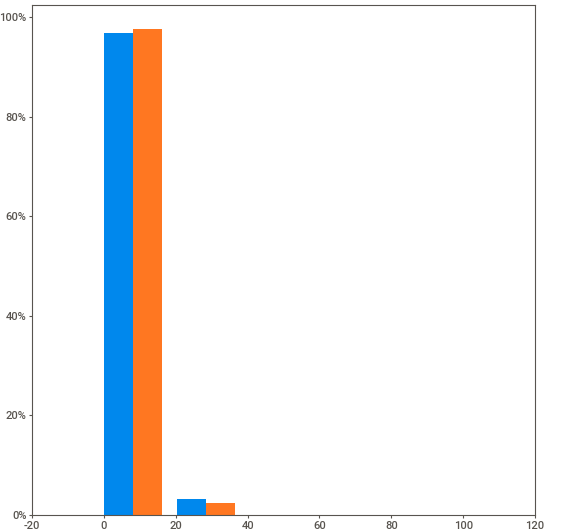
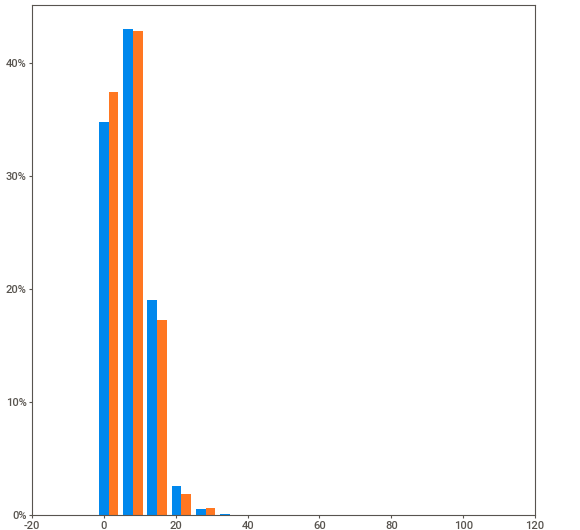
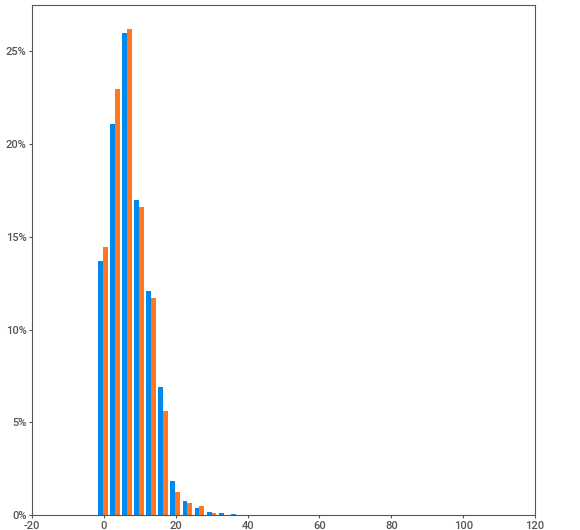
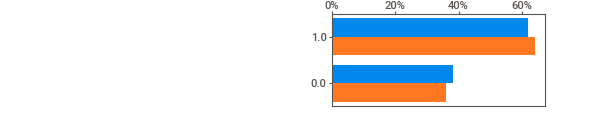
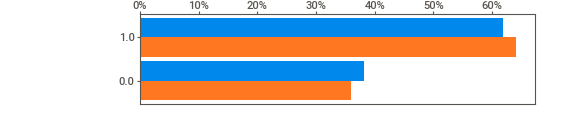
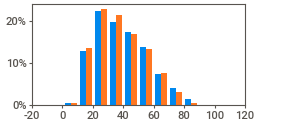
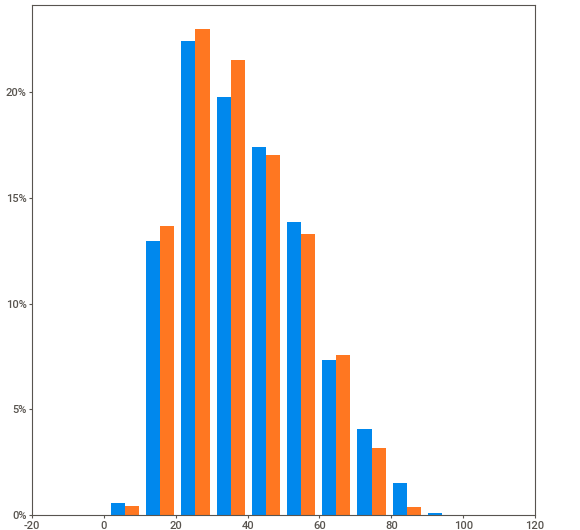
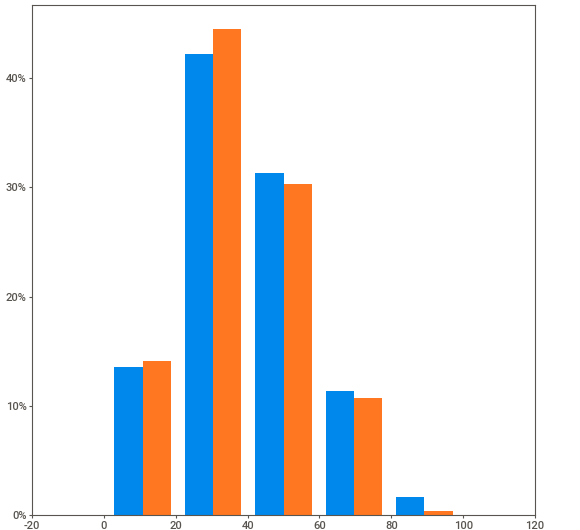
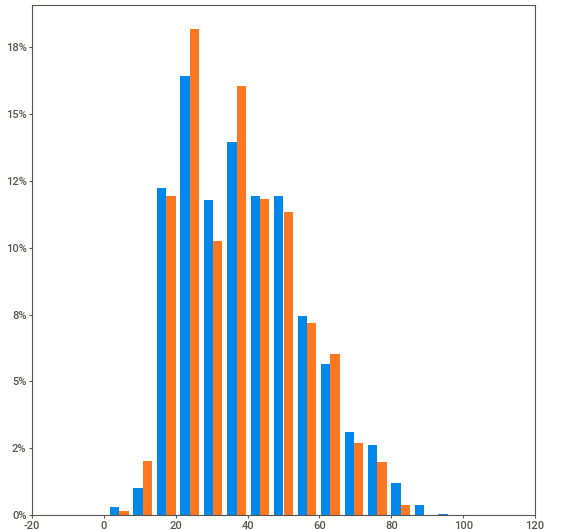
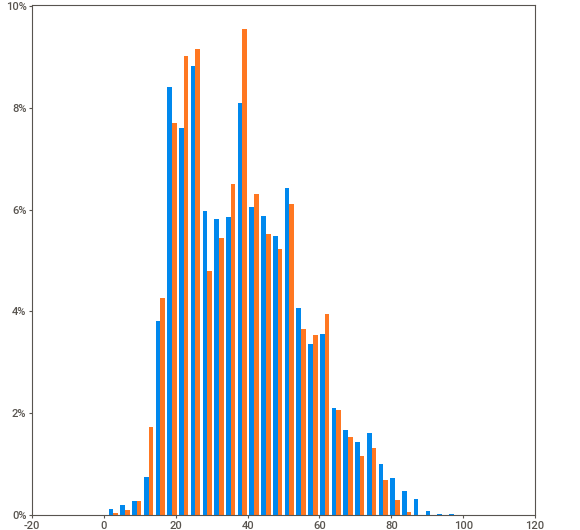
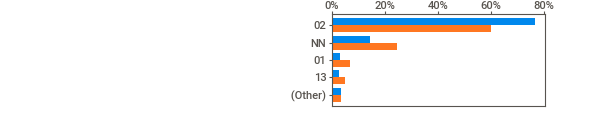
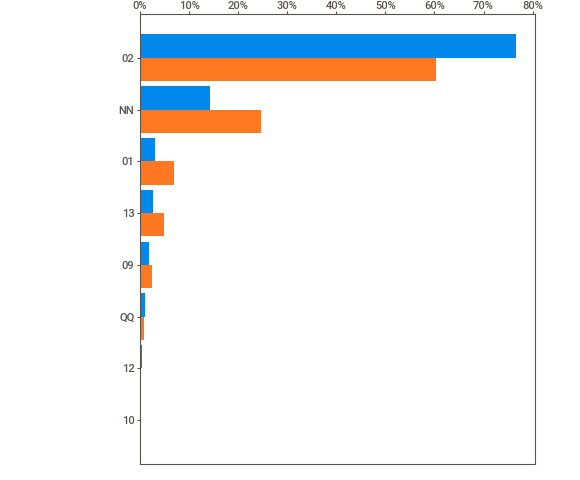
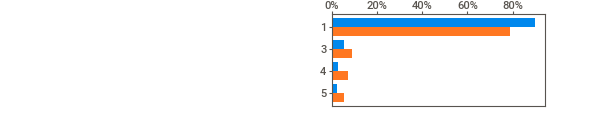
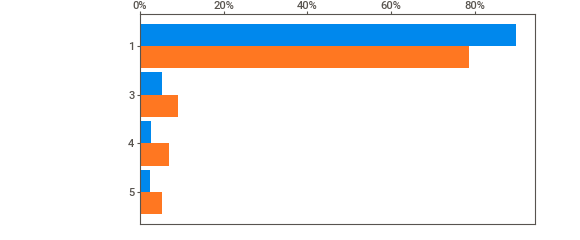
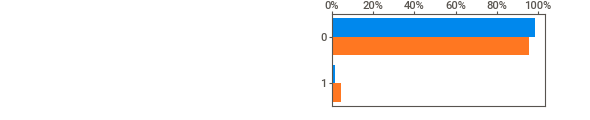
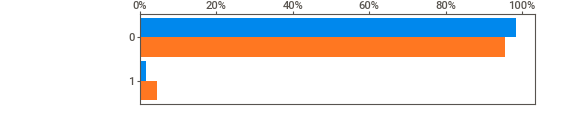
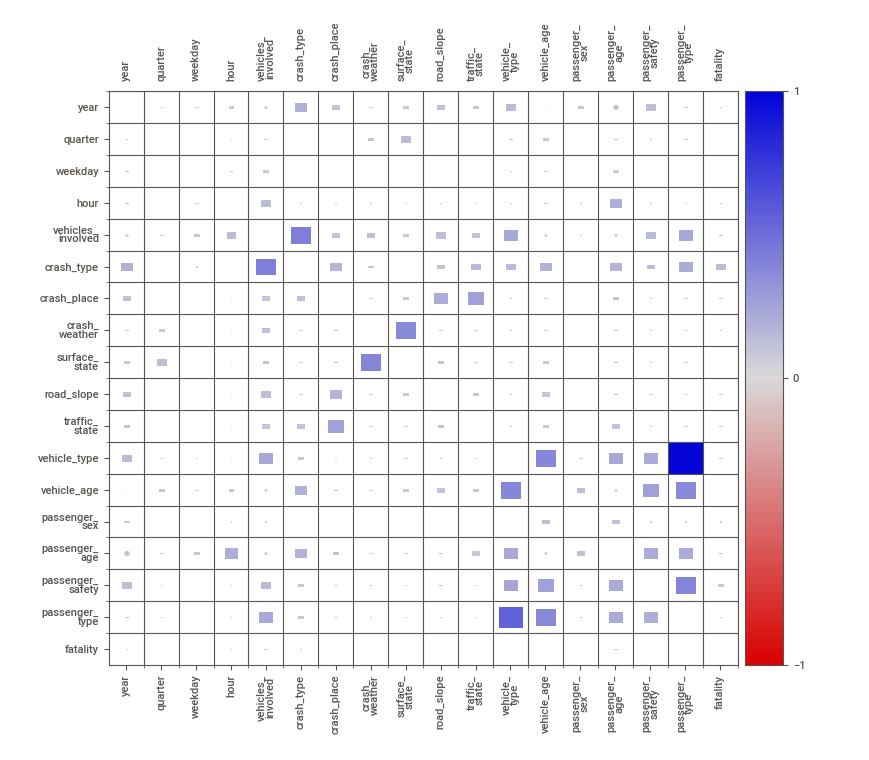
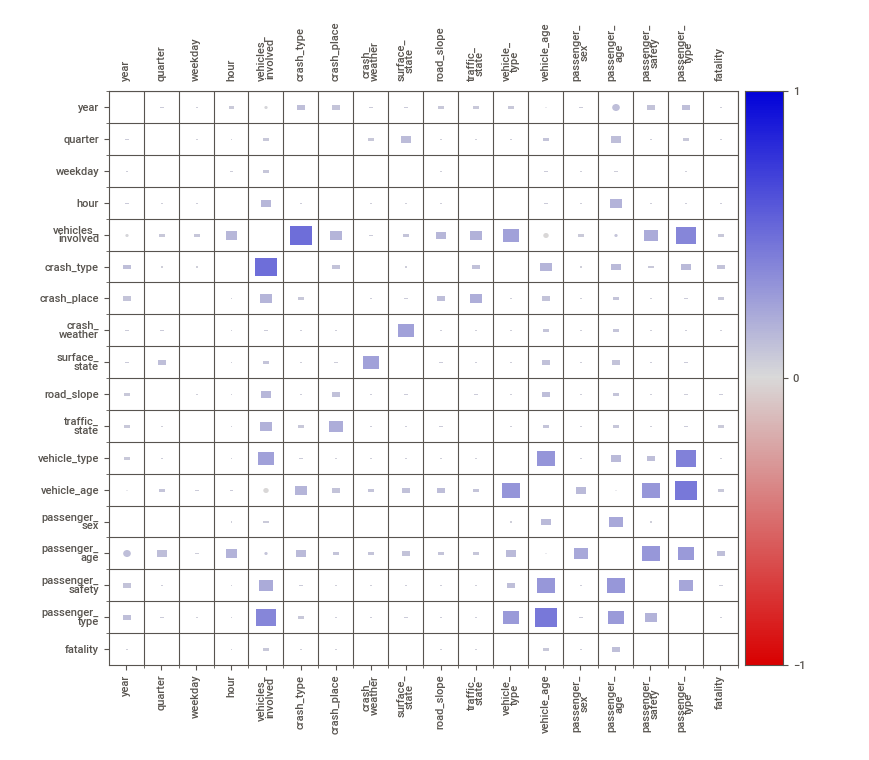

In [9]:
feature_config = sv.FeatureConfig() #,force_text=[""]
my_report = sv.compare([real_data, "Real Data"], [synthetic_data, "Synthetic Data"], feat_cfg=feature_config)
my_report.show_notebook( 
            layout='widescreen', 
            scale=None)

In [14]:
list_cat = ['quarter', 'weekday', 'vehicles_involved', 'passenger_sex', 'passenger_type','crash_type', 'crash_place', 'crash_weather', 'surface_state', 'road_slope', 'traffic_state', 'vehicle_type', 'passenger_safety']

In [16]:
for df in  [synthetic_data,real_data]:
    for col in list_cat:
        df[col] = df[col].astype(str)
        df[col].fillna(value='Nulo', inplace=True)

In [17]:
table_evaluator = TableEvaluator(real_data, synthetic_data,  cat_cols=list_cat)

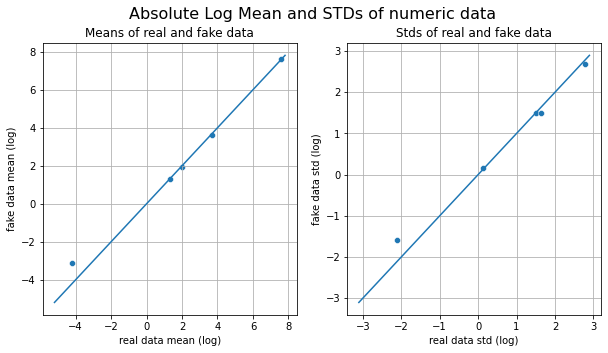

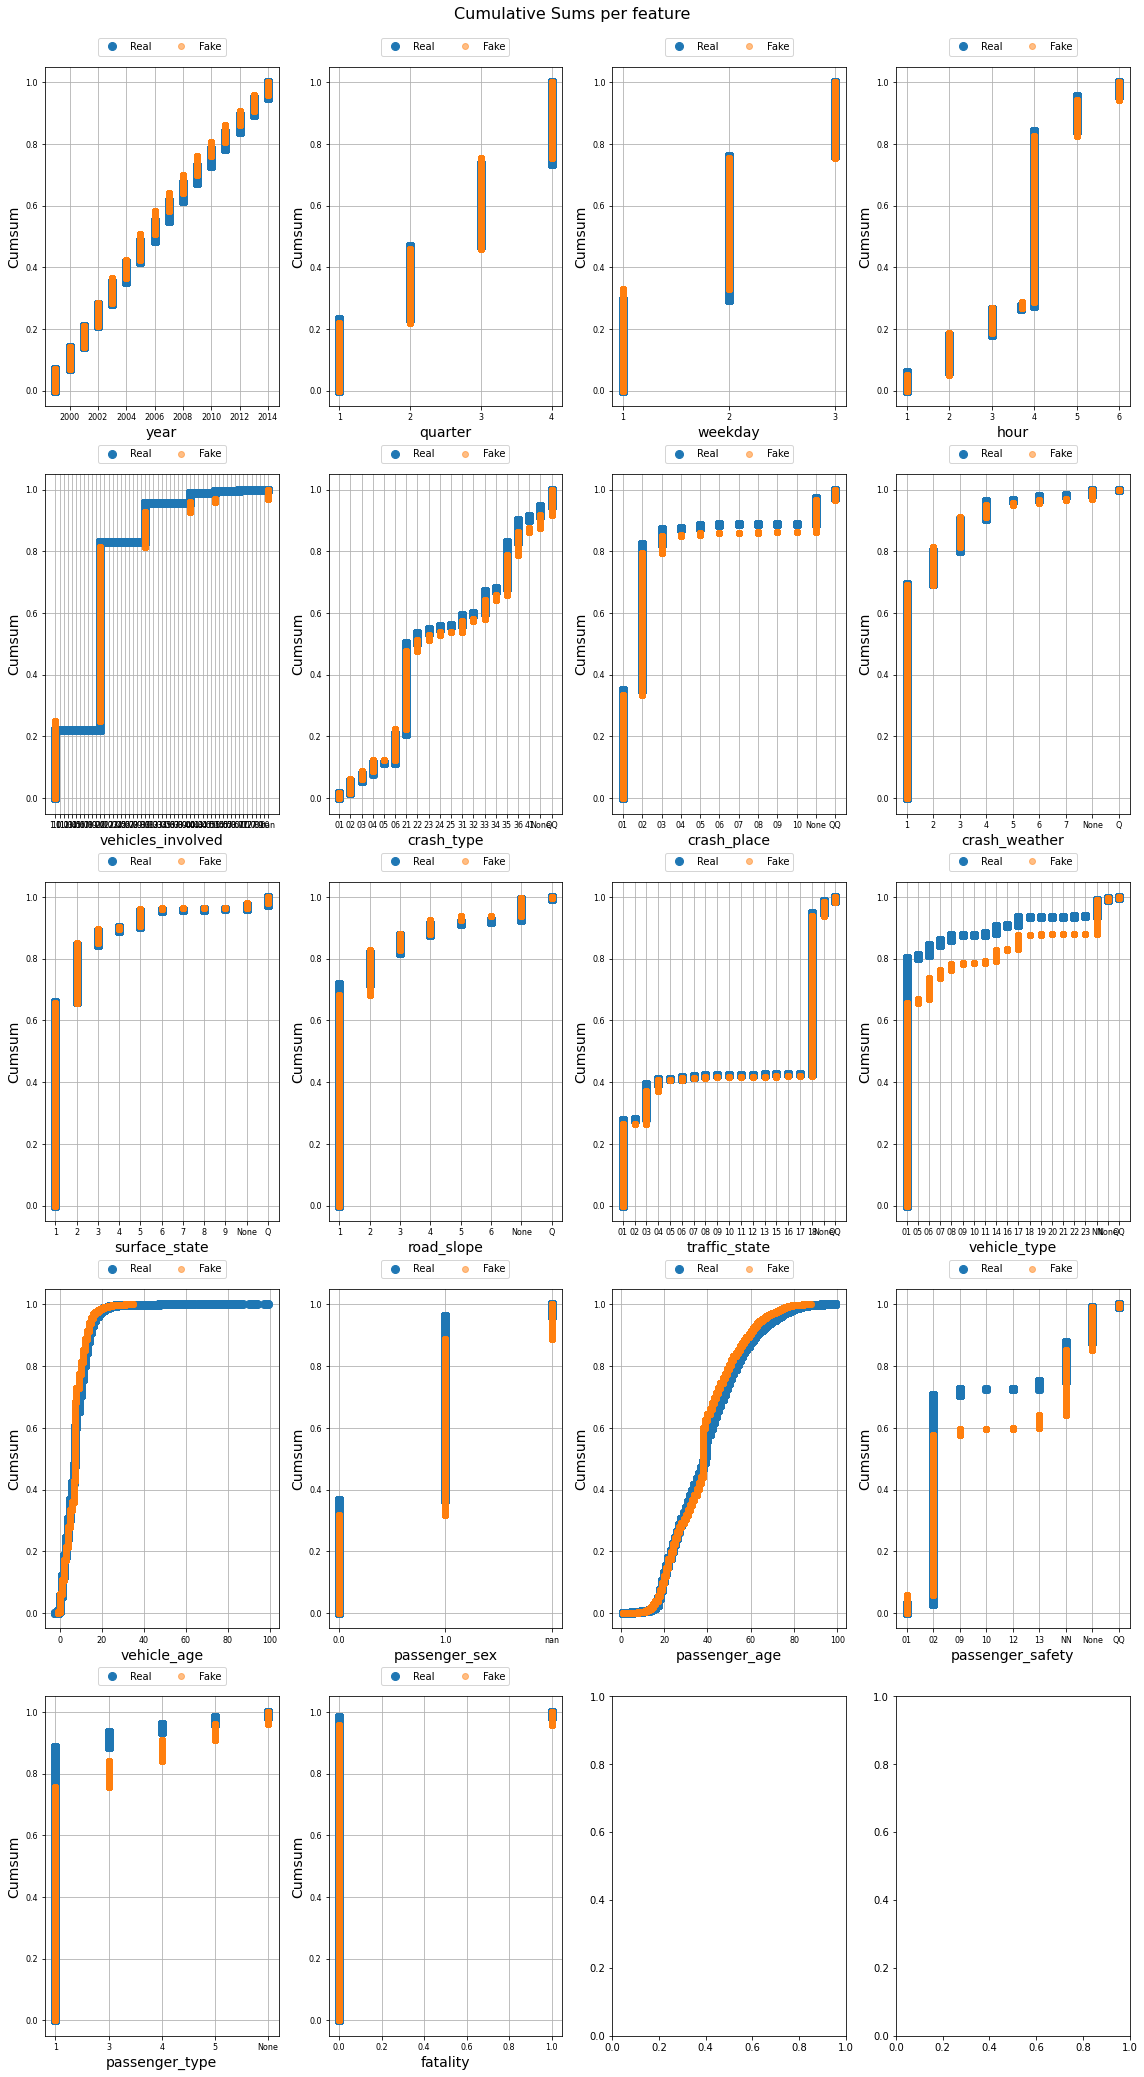

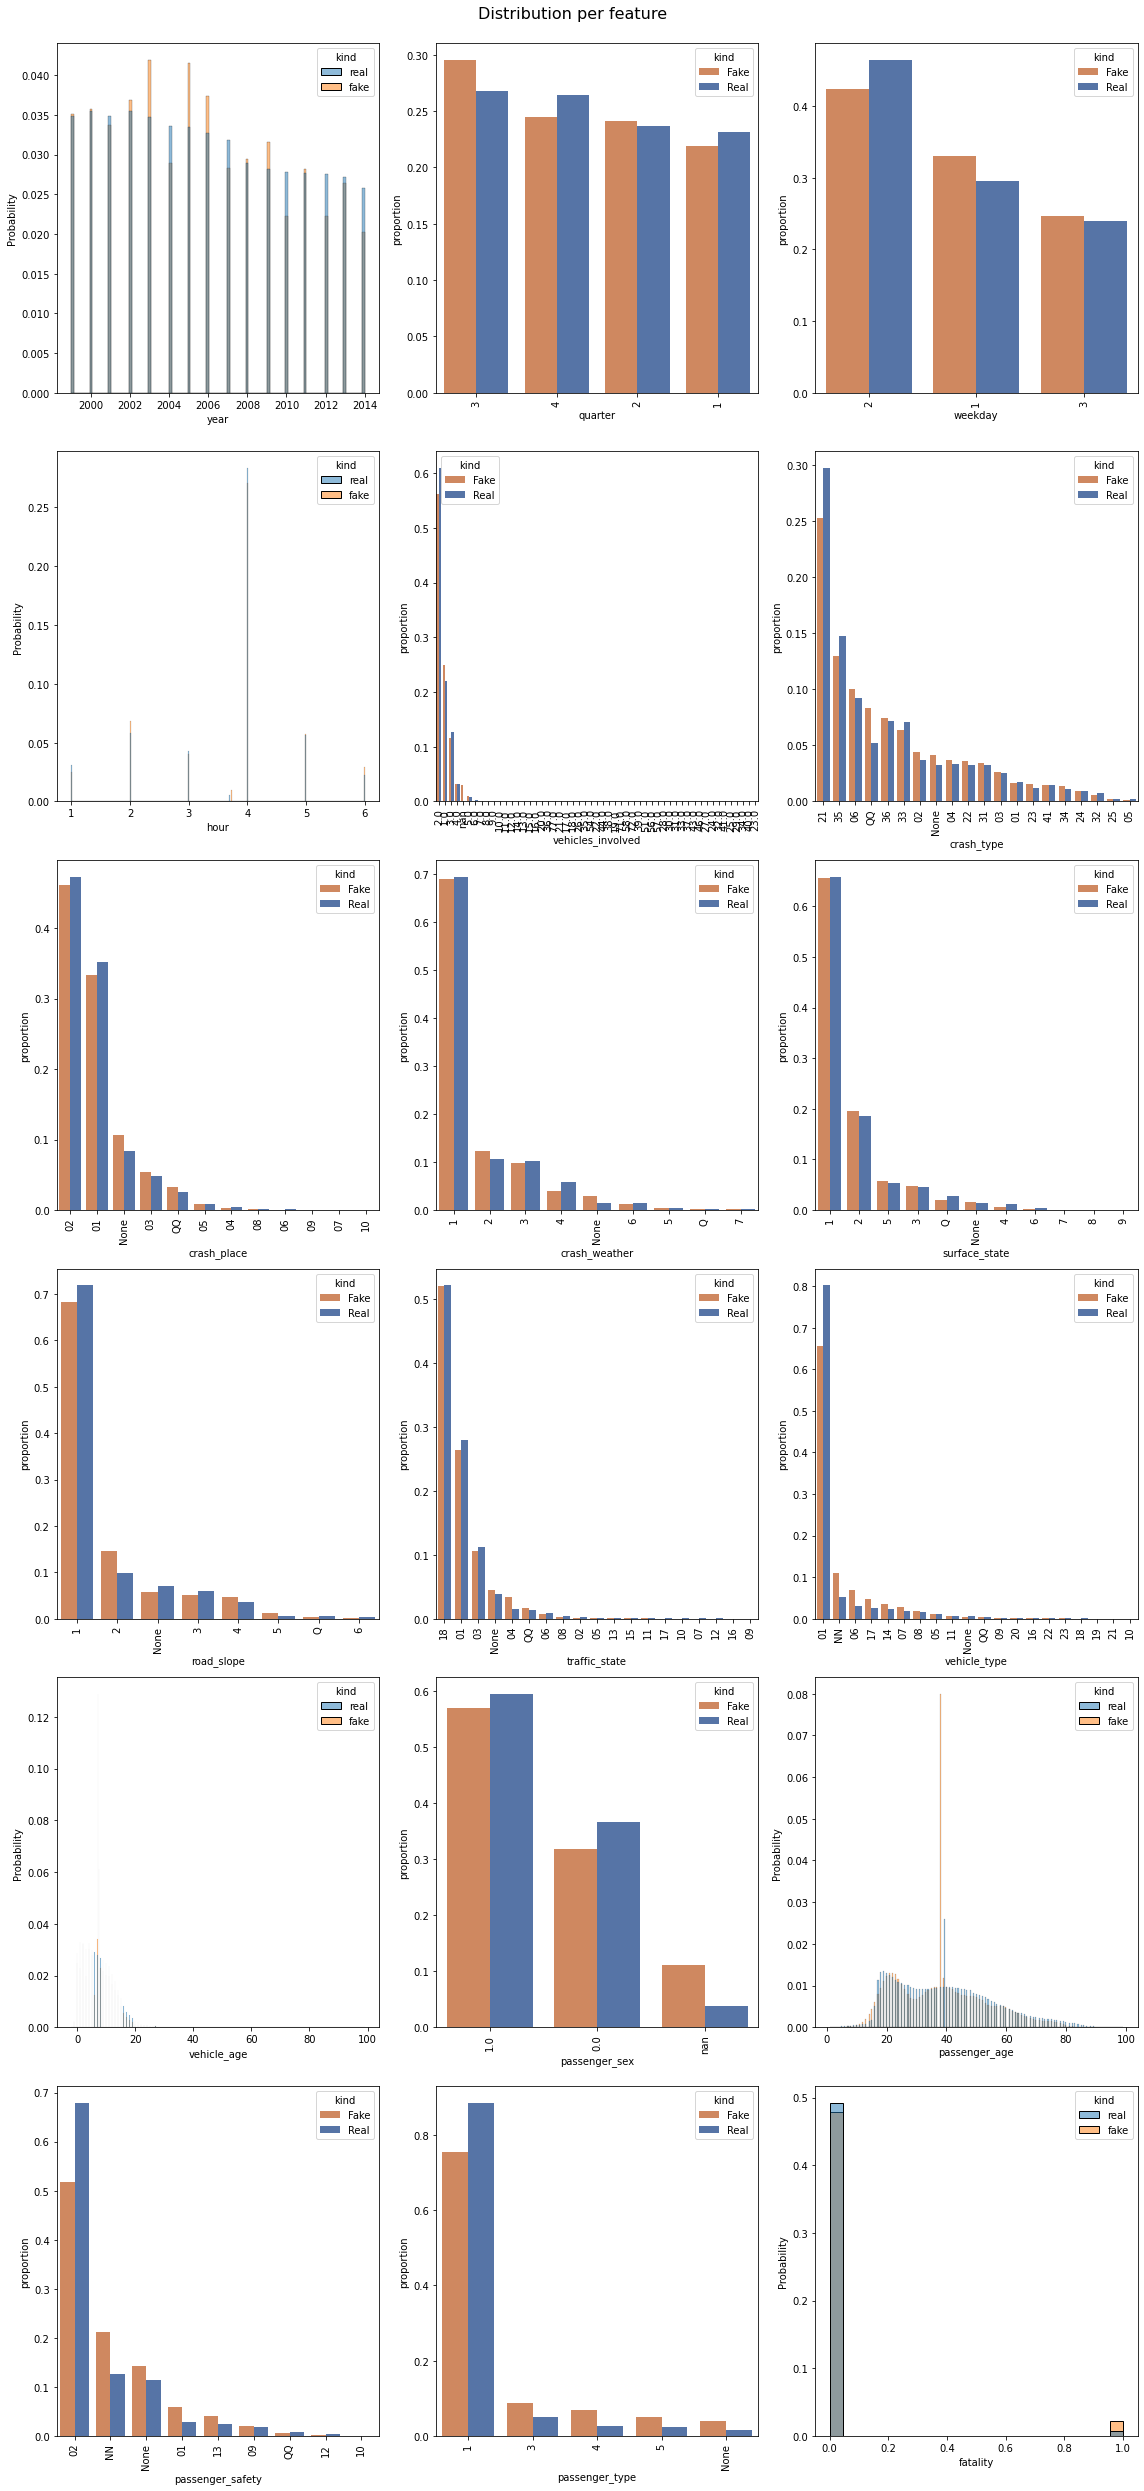

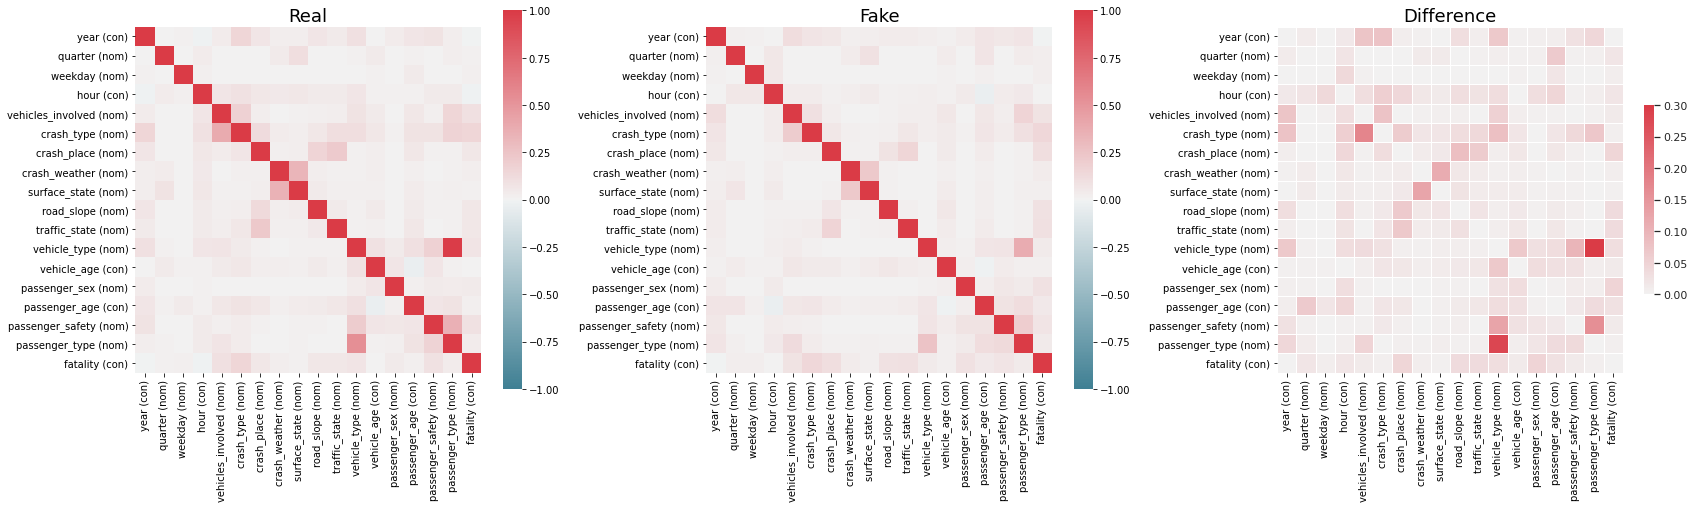

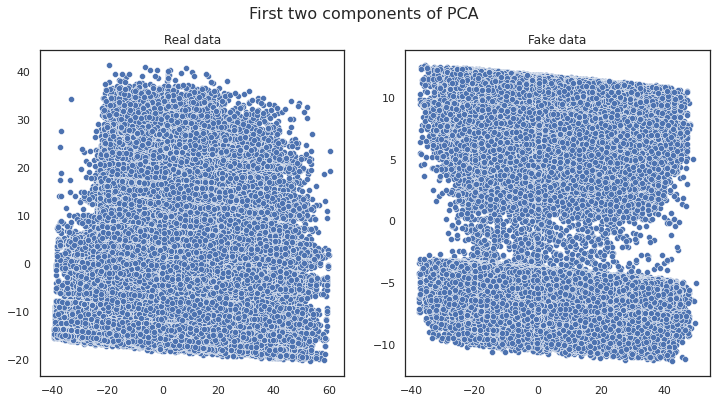

In [18]:
table_evaluator.visual_evaluation()

## Evaluation Metrics

In [20]:
metrics_list = ['BinaryDecisionTreeClassifier','BinaryAdaBoostClassifier','LogisticDetection','CSTest','KSTest','KSTestExtended']

In [ ]:
ev = evaluate(synthetic_data, real_data,metadata,aggregate=False,table_name='ncbd', metrics=metrics_list)

In [ ]:
ev

In [19]:
table_evaluator.evaluate(target_col='fatality',target_type='class')


Classifier F1-scores and their Jaccard similarities::
                             f1_real  f1_fake  jaccard_similarity
index                                                            
DecisionTreeClassifier_fake   0.8883   0.9113              0.7807
DecisionTreeClassifier_real   0.9669   0.9077              0.8241
RandomForestClassifier_fake   0.9561   0.9556              0.9955
RandomForestClassifier_real   0.9848   0.9827              0.9928

Privacy results:
                                               result
Duplicate rows between sets (real/fake)  (5869, 3631)
nearest neighbor mean                          2.3964
nearest neighbor std                           0.4412

Miscellaneous results:
                                  Result
Column Correlation Distance RMSE  0.0482
Column Correlation distance MAE   0.0208

Results:
                                                result
Basic statistics                                0.9970
Correlation column correlations                 